In [1]:
import numpy as np
import pandas as pd
import scipy.signal as ssg
import scipy.interpolate as interp
%matplotlib widget
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
file_loc = "C:\\Users\\Luke\\Downloads\\sample_timepoints_gaze.csv"
camrot_loc = "C:\\Users\\Luke\\Downloads\\sample_timepoints_camrot.csv"
tps = pd.read_csv(file_loc)
# print(len(tps))
camrot_df = pd.read_csv(camrot_loc)
tps = pd.concat([tps, camrot_df], axis=1)
# viewing alloeye_41r1_13_enc
# print(len(camrot_df))

In [3]:
table_x = 0.2595667
table_y = 0.8
table_z = 0.2811971
table_rad =0.5

In [80]:
tps.head(10)

eye_timestamp_ms              gaze_object  gaze_collision_x  \
0            554013  FirstInstructionsCanvas          0.250856   
1            554038                     Well          7.620410   
2            554046                     Well          7.596853   
3            554063                     Well          7.582600   
4            554071                     Well          7.589627   
5            554096                     Well          7.647853   
6            554113                     Well          7.647853   
7            554121            OcclusionDome          0.223210   
8            554146            OcclusionDome          0.035535   
9            554155            OcclusionDome         -0.057564   

   gaze_collision_y  gaze_collision_z  left_gaze_origin_x  left_gaze_origin_y  \
0          1.490129          0.258980            32.15085           -0.757523   
1          0.751966         -2.130015            32.18372           -0.850037   
2          0.771597         -2.141181            32.19153           -0.869934   
3          0.782404         -2.147938            32.20164           -0.877319   
4          0.804456         -2.144607            32.20575           -0.873627   
5          0.838873         -2.117006            32.23398           -0.879150   
6          0.838873         -2.117006            32.24475           -0.908798   
7          1.500963          0.260007            32.24847           -0.906021   
8          1.520893          0.320891            32.26881           -0.892487   
9          1.536140          0.353042            32.27454           -0.885590   

   left_gaze_origin_z  right_gaze_origin_x  right_gaze_origin_y  \
0           -24.20937            -25.76807            -1.148254   
1           -24.13663            -25.74234            -1.390900   
2           -24.10681            -25.72937            -1.465973   
3           -24.08231            -25.69633            -1.574509   
4           -24.09456            -25.68787            -1.596039   
5           -24.20515            -25.65164            -1.690231   
6           -24.23886            -25.64442            -1.761841   
7           -24.28288            -25.64009            -1.817963   
8           -24.41745            -25.63771            -1.818420   
9           -24.45206            -25.63727            -1.802444   

   right_gaze_origin_z  camera_x  camera_y  camera_z  cam_rotation_x  \
0            -21.98216 -0.793809  1.608794  0.498109        1.038667   
1            -21.44284 -0.793809  1.608794  0.498109        1.038667   
2            -21.25189 -0.793809  1.608794  0.498109        1.038667   
3            -20.98698 -0.793809  1.608794  0.498109        1.038667   
4            -20.93938 -0.793809  1.608794  0.498109        1.038667   
5            -20.79288 -0.793809  1.608794  0.498109        1.038667   
6            -20.68854 -0.793809  1.608794  0.498109        1.038667   
7            -20.56119 -0.793809  1.608794  0.498109        1.038667   
8            -20.57123 -0.793809  1.608794  0.498109        1.038667   
9            -20.62621 -0.793809  1.608794  0.498109        1.038667   

   cam_rotation_y  cam_rotation_z  
0        103.1602        4.519909  
1        103.1602        4.519909  
2        103.1602        4.519909  
3        103.1602        4.519909  
4        103.1602        4.519909  
5        103.1602        4.519909  
6        103.1602        4.519909  
7        103.1602        4.519909  
8        103.1602        4.519909  
9        103.1602        4.519909

In [4]:
    x = tps.gaze_collision_x.to_numpy()
    y = tps.gaze_collision_y.to_numpy()
    z = tps.gaze_collision_z.to_numpy()
    t = tps.eye_timestamp_ms.to_numpy()

In [5]:
# get sampling distribution - histogram shows 4 main different time intervals between samples - 8-9ms, 16-17ms,  
t_diff = np.diff(t)
# print(t_diff)
# plt.hist(t_diff)
# plt.plot(t[1:], t_diff)

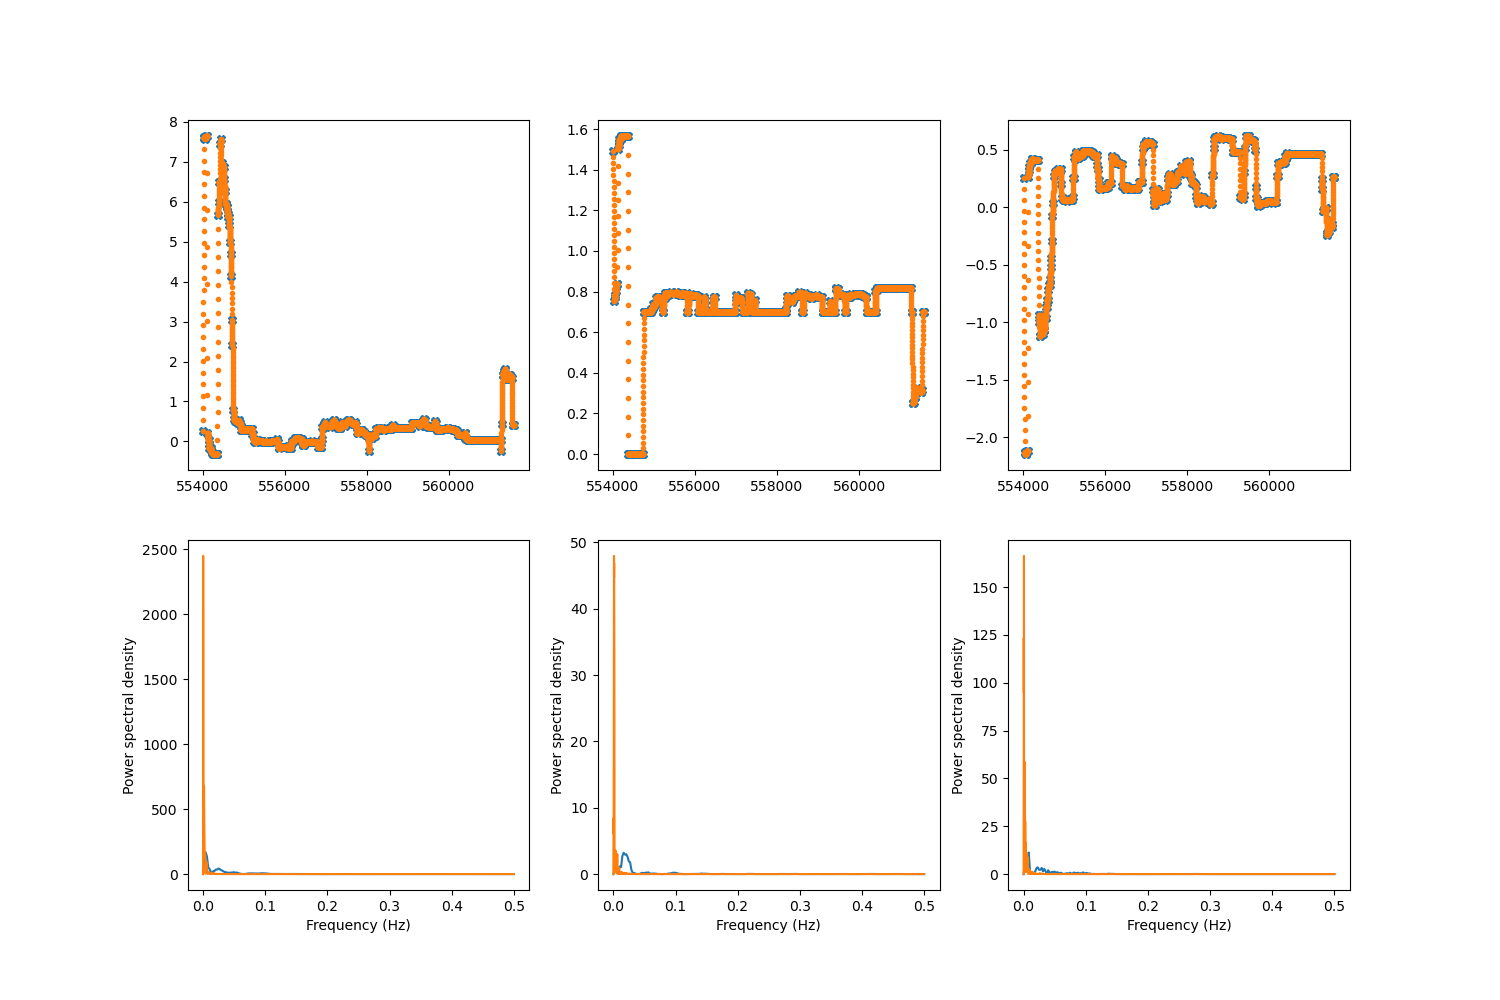

In [6]:
# upsample
t_new = np.arange(np.min(t), np.max(t), 1)

def upsample(signal, t, t_new):
    interpf = interp.interp1d(t,signal)
    return interpf(t_new)

fig, ax_list = plt.subplots(2,3, figsize=(15, 10), dpi=100)
signal = [x, y, z]
up_signal = []
for i in range(3):
    ax=ax_list[0, i]
    y_axis = signal[i]
    yax_linear = upsample(y_axis, t, t_new)
    up_signal.append(yax_linear)
    ax.plot(t, y_axis, 'X') 
    ax.plot(t_new, yax_linear, '.')

# fig 2 - psd
for i in range(3):
    ax=ax_list[1, i]
    up_sig = up_signal[i]
    f, Pxx_den = ssg.periodogram(signal[i])
    f_up, Pxx_den_up = ssg.periodogram(up_sig)
    ax.plot(f, Pxx_den)
    ax.plot(f_up, Pxx_den_up)
    ax.set_ylabel('Power spectral density')
    ax.set_xlabel('Frequency (Hz)')

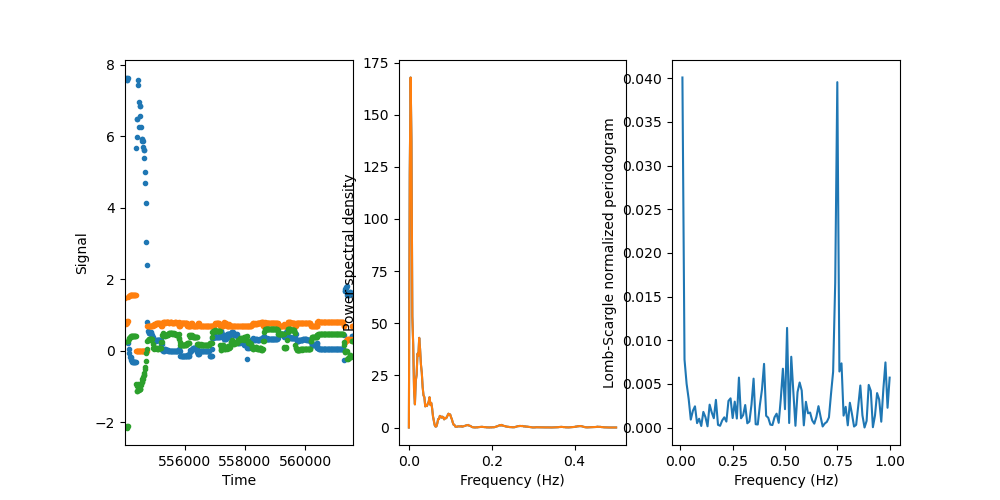

In [7]:

fig, ax_list = plt.subplots(1,3, figsize=(10, 5), dpi=100)

# fig 1 - signal over time
ax=ax_list[0]
ax.plot(t, x, '.', t, y, '.', t, z, '.')
ax.set_ylabel("Signal")
ax.set_xlabel("Time")
ax.set_xlim((t[0], t[-1]))

# fig 2 - psd
ax=ax_list[1]
f, Pxx_den = ssg.periodogram(x)
ax.plot(f, Pxx_den)
ax.plot(f, Pxx_den)
ax.set_ylabel('Power spectral density')
ax.set_xlabel('Frequency (Hz)')

# fig 3
# Plot Lomb-Scargle spectrogram of input signal
ax = ax_list[2]

f = np.linspace(0.01, 1, 100)
pgram = ssg.lombscargle(t, x, f, normalize=True)
ax.plot(f, pgram)
ax.set_ylabel("Lomb-Scargle normalized periodogram")
ax.set_xlabel('Frequency (Hz)')
plt.savefig('periodogram_plot.png', dpi=300, bbox_inches='tight')

(-0.21880290000000002, 0.7811971)

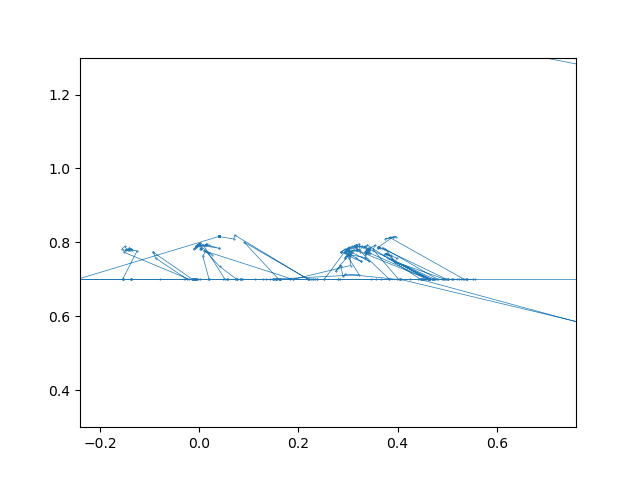

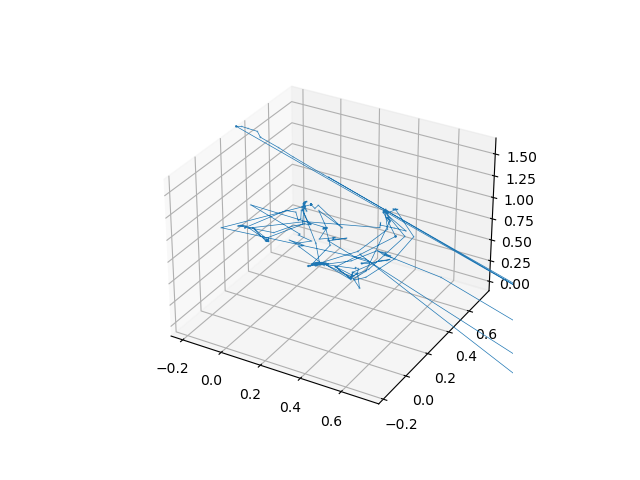

In [15]:
ax = plt.figure().add_subplot()
ax.scatter(signal[0], signal[1], s=0.2)  # note: in unity, y is up
ax.plot(up_signal[0], up_signal[1], linewidth=0.5);
ax.set_xlim(table_x - table_rad, table_x + table_rad)
ax.set_ylim(table_y - table_rad, table_y + table_rad)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(signal[0], signal[2], signal[1], 'X', s = 0.2)  # note: in unity, y is up
ax.plot(up_signal[0], up_signal[2],  up_signal[1], linewidth=0.5);
ax.set_xlim(table_x - table_rad, table_x + table_rad)
ax.set_ylim(table_z - table_rad, table_z + table_rad)

In [8]:
# CALCULATE X AND Y NORMALISED TO CAMERA LOCATION
# https://stackoverflow.com/questions/23472048/projecting-3d-points-to-2d-plane
# https://www.baeldung.com/cs/3d-point-2d-plane
origin_x = np.mean(tps.camera_x)
origin_y = np.mean(tps.camera_y)
origin_z = np.mean(tps.camera_z)

n_x = table_x - origin_x
n_y = table_y - origin_y
n_z = table_z - origin_z

print(f"norm: ({n_x:.3f}, {n_z:.3f}, {n_y:.3f})")

def project_3d_to_2d(point, origin, normal):
    
    pass

norm: (1.034, -0.217, -0.756)


[0.2508556  0.54563778 0.84041995 1.13520213 1.4299843  1.72476648
 2.01954866 2.31433083 2.60911301 2.90389518]
[0.48258194 0.64775419 0.83706293 1.05035828 1.28701301 1.54591855
 1.82549418 2.1237095  2.43811968 2.76591291]


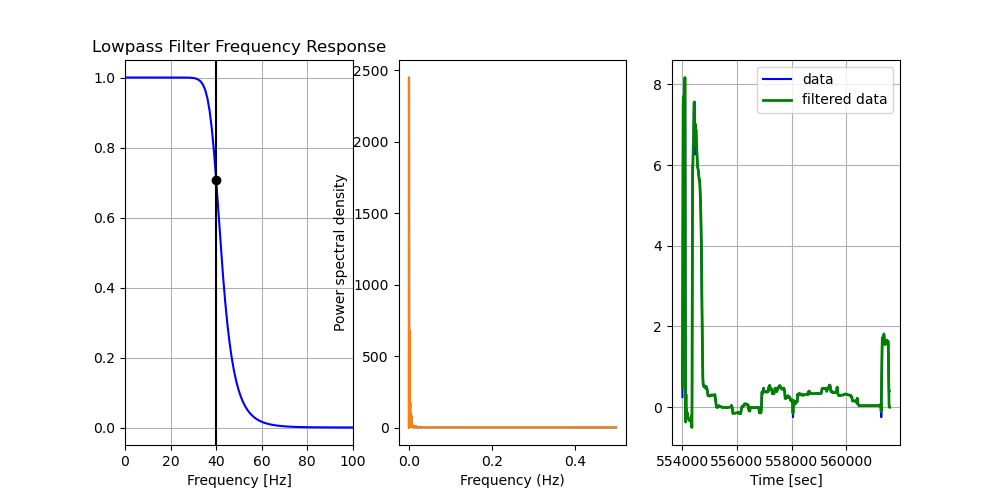

In [23]:
# low pass filter
# https://medium.com/analytics-vidhya/how-to-filter-noise-with-a-low-pass-filter-python-885223e5e9b7
# Filter requirements.

# butterworth filter

def butter_lowpass(cutoff, fs, order=5):
    return ssg.butter(order, cutoff, fs=fs, btype='low', analog=False)

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = ssg.lfilter(b, a, data)
    return y

def zero_lag_butter(data, cutoff, fs, order=5):
    padding_front = np.repeat(data[0], fs)
    padding_back = np.repeat(data[-1], fs)
    # print(padding_front)
    data = np.concatenate((padding_front, data, padding_back))
    forward = butter_lowpass_filter(data, cutoff, fs, order)
    # print("f done")
    reverse = np.flip(forward)
    # print(reverse)
    backward = butter_lowpass_filter(reverse, cutoff, fs, order)
    rereverse = np.flip(backward)
    return rereverse[int(fs):-int(fs)]  # remove zero padding

def zero_moving_average(x, w):
    x = x.reshape(-1,)
    filt = np.convolve(x, np.ones(w), 'valid') / w
    len_diff = len(x) - len(filt)
    shift = int(np.ceil(len_diff/2))
    print(shift)
    print(x[:shift])
    out = np.concatenate((x[:shift], filt, x[-shift:]))  # appends first few of raw signal to beginning to keep length same - could ma filter this until 
    return out

# Filter requirements.
order = 10
fs = 1000       # sample rate, Hz
cutoff = 40  # desired cutoff frequency of the filter, Hz

# Get the filter coefficients so we can check its frequency response.
b, a = butter_lowpass(cutoff, fs, order)

# Plot the frequency response.
w, h = ssg.freqz(b, a, fs=fs)
fig, ax_list = plt.subplots(1,3, figsize=(10, 5), dpi=100)
ax = ax_list[0]
ax.plot(w, np.abs(h), 'b')
ax.plot(cutoff, 0.5*np.sqrt(2), 'ko')
ax.axvline(cutoff, color='k')
ax.set_xlim(0, 100)
ax.set_title("Lowpass Filter Frequency Response")
ax.set_xlabel('Frequency [Hz]')
ax.grid()

x = up_signal[0]

# fig 2 - psd
ax=ax_list[1]
f, Pxx_den = ssg.periodogram(x)
ax.plot(f, Pxx_den)
ax.plot(f, Pxx_den)
ax.set_ylabel('Power spectral density')
ax.set_xlabel('Frequency (Hz)')

# Demonstrate the use of the filter.
# Filter the data, and plot both the original and filtered signals.

y = zero_lag_butter(x, cutoff, fs, order)
print(x[:10])
print(y[:10])
ax = ax_list[2]
ax.plot(t_new, x, 'b-', label='data')
ax.plot(t_new, y, 'g-', linewidth=2, label='filtered data')
ax.set_xlabel('Time [sec]')
ax.grid()
ax.legend()

# plt.subplots_adjust(hspace=0.35)

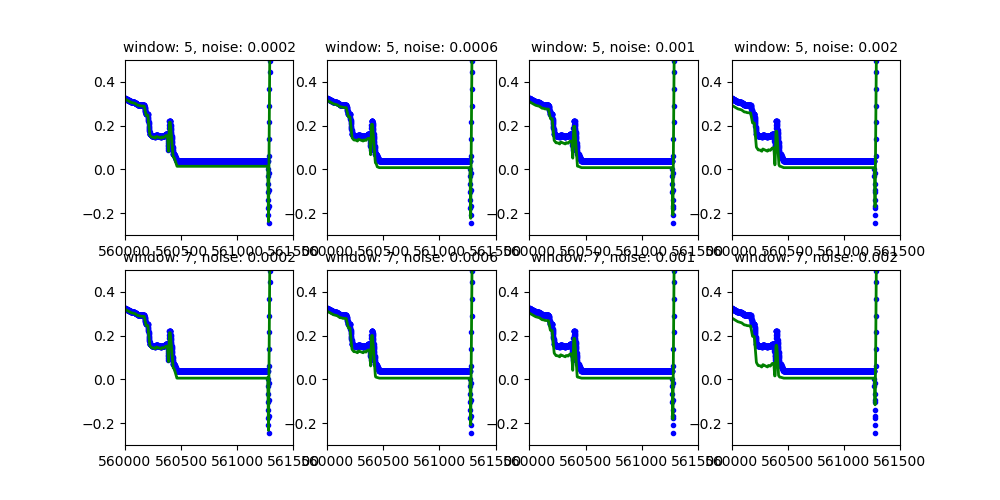

In [29]:
# wiener filter


# Filter requirements.
order = 10
fs = 1000       # sample rate, Hz
cutoff = 10  # desired cutoff frequency of the filter, Hz
noise = 0.0001
windows = [5, 7]
noises = [0.0002, 0.0006, 0.001, 0.002]
fig, ax_list = plt.subplots(len(windows),len(noises), figsize=(10, 5), dpi=100)

def wiener_plot(i, t, fig_i, fig_j):
    x = up_signal[i]
    x = x.reshape(len(x), 1)
    window = windows[fig_i]
    noise = noises[fig_j]
    t_re = t.reshape(len(x), 1)
    # Get the filter coefficients so we can check its frequency response.
    ws = ssg.wiener(x, (window, window), noise)
    ax = ax_list[fig_i, fig_j]
    ax.plot(t_re, x, 'b.', label='data')
    ax.plot(t_re, ws, 'g-', linewidth=2, label='filtered data')
    ax.set_title(f'window: {windows[fig_i]}, noise: {noises[fig_j]}', fontsize=10)
    ax.set_xlim([560000, 561500])
    ax.set_ylim([-0.3, 0.5])
    
for i in range(len(windows)):
    for j in range(len(noises)):
        wiener_plot(0, t_new, i, j)
    

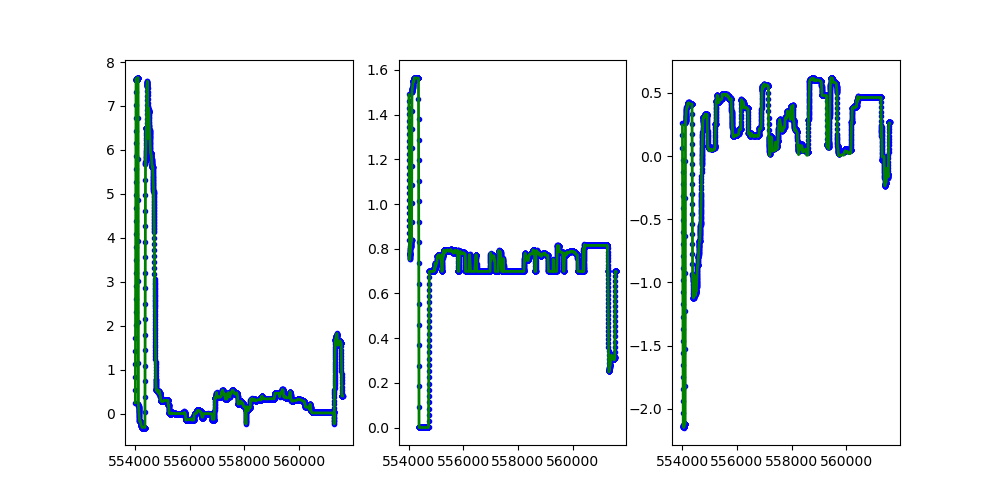

In [30]:
filtered_signals = []
window = 5
noise = 0.0002
fig, ax_list = plt.subplots(1,3, figsize=(10, 5), dpi=100)
for i in range(len(up_signal)):
    sig = up_signal[i]
    sig = sig.reshape(len(x), 1)
    filt_sig = ssg.wiener(sig, (window, window), noise)
    filtered_signals.append(filt_sig)
    t_re = t_new.reshape(len(x), 1)
    ax = ax_list[i]
    ax.plot(t_re, sig, 'b.', label='data')
    ax.plot(t_re, filt_sig, 'g-', linewidth=2, label='filtered data')


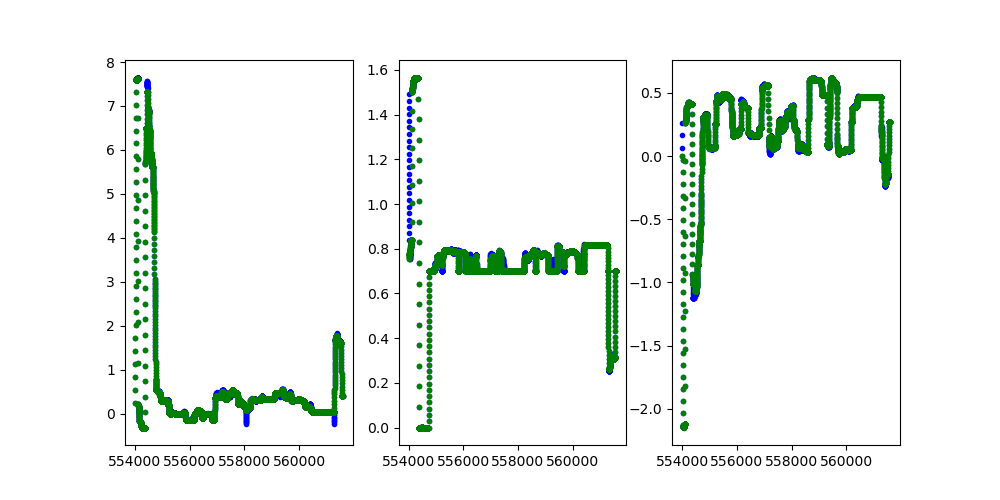

In [31]:
med_window = 59    # equivalent to 7-point median filter at 120Hz uniform
# window = 41    # equivalent to 5-point median filter at 120Hz uniform
# window = 25    # equivalent to 3-point median filter at 120Hz uniform
fig, ax_list = plt.subplots(1,3, figsize=(10, 5), dpi=100)
mf_sig = []
for i in range(len(up_signal)):
    sig = up_signal[i]
    # sig = sig.reshape(-1, 1)
    filt_sig = ssg.medfilt(sig, med_window)
    mf_sig.append(filt_sig)
    # t_re = t_new.reshape(-1, 1)
    ax = ax_list[i]
    ax.plot(t_re, sig, 'b.', label='data')
    ax.plot(t_re, filt_sig, 'g.', linewidth=2, label='filtered data')

(7573,)
12
[0.2508556  0.54563778 0.84041995 1.13520213 1.4299843  1.72476648
 2.01954866 2.31433083 2.60911301 2.90389518 3.19867736 3.49345954]
(7573,)
(7573,)
12
[0.7519662  0.75442006 0.75687393 0.75932779 0.76178165 0.76423551
 0.76668938 0.76914324 0.7715971  0.77223281 0.77286851 0.77350422]
(7573,)
(7573,)
12
[ 0.          0.          0.         -0.02769914 -0.12325895 -0.21881876
 -0.31437857 -0.40993838 -0.5054982  -0.60105801 -0.69661782 -0.79217763]
(7573,)


(-0.21880290000000002, 0.7811971)

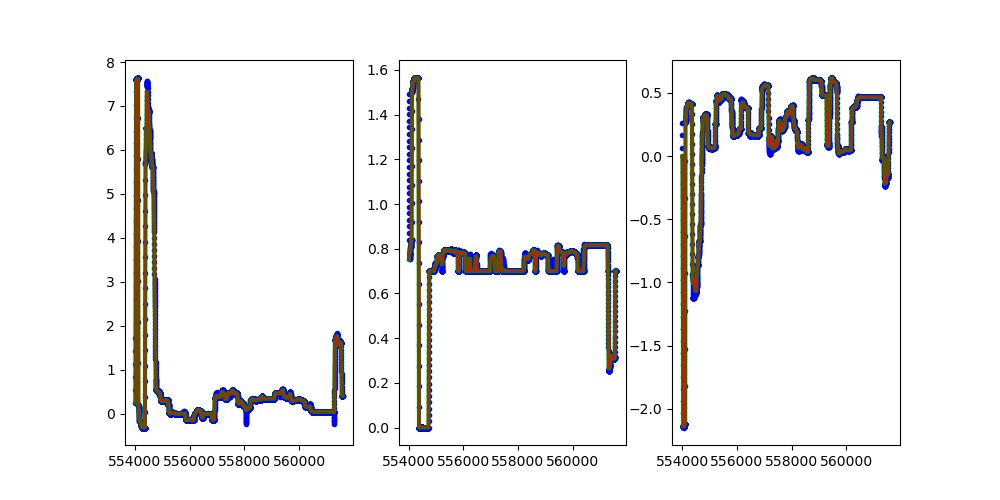

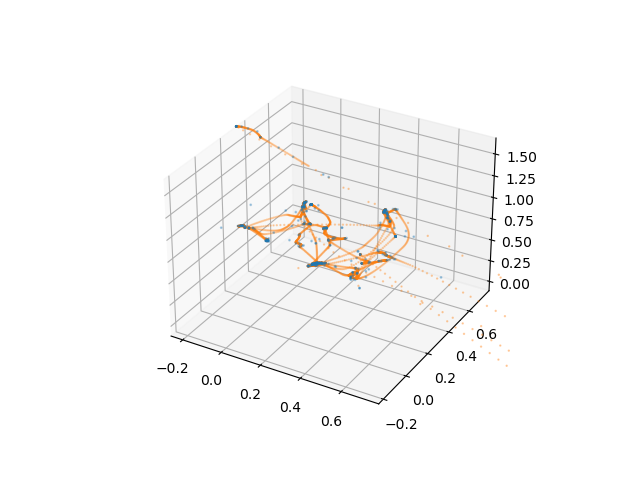

In [101]:
def moving_average(x, w):
    x = x.reshape(-1,)
    filt = np.convolve(x, np.ones(w), 'valid') / w
    len_diff = len(x) - len(filt)
    out = np.append(x[:len_diff], filt)  # appends first few of raw signal to beginning to keep length same - could ma filter this until 
    return out

window = 59    # equivalent to 7-point at 120Hz uniform
# window = 41    # equivalent to 5-point at 120Hz uniform
# ma_window = 25    # equivalent to 3-point at 120Hz uniform
# window = 17
fig, ax_list = plt.subplots(1,3, figsize=(10, 5), dpi=100)
ma_filt = []
for i in range(len(up_signal)):
    sig = mf_sig[i]
    print(np.shape(sig))
    filt_sig = zero_moving_average(sig, ma_window)
    print(np.shape(filt_sig))
    ma_filt.append(filt_sig)
    ax = ax_list[i]
    ax.plot(t_new, up_signal[i], 'b.', label='data', linewidth=2)
    ax.plot(t_new, sig, 'g-', label='data', linewidth=3)
    ax.plot(t_new, filt_sig, 'r-', linewidth=1, label='filtered data')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(signal[0], signal[2], signal[1], 'rX', s = 1) 
ax.scatter(ma_filt[0], ma_filt[2], ma_filt[1], 'g.', s = 0.5)  # note: in unity, y is up
# ax.plot(ma_filt[0], ma_filt[2],  ma_filt[1], linewidth=0.5);
ax.set_xlim(table_x - table_rad, table_x + table_rad)
ax.set_ylim(table_z - table_rad, table_z + table_rad)

8
[0.83318811 0.99681339 1.18970722 1.40525992 1.63833174 1.88491943
 2.14189651 2.40681051]
8
[1.13535058 1.13535058 1.13535058 1.13535058 1.13535058 1.13535058
 1.13535058 1.13535058]
8
[ 0.          0.         -0.04538032 -0.11525977 -0.19081944 -0.27076187
 -0.35407394 -0.43996111]
[0.83318811 0.99681339 1.18970722 ... 0.40527453 0.40525947 0.40524779]


(-0.21880290000000002, 0.7811971)

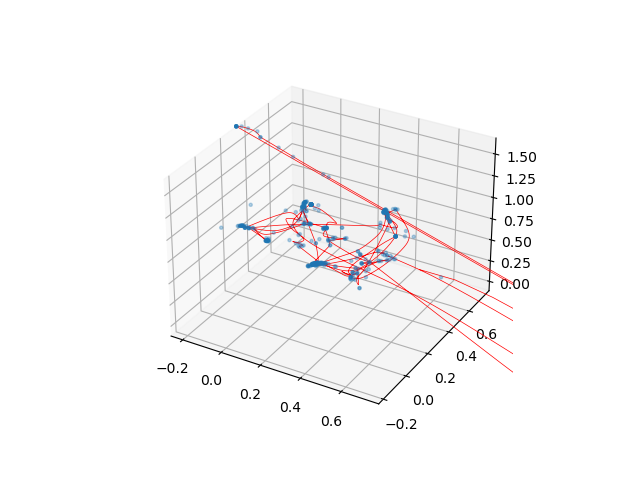

In [128]:
def filter_signal(data, butter_order, butter_fs, butter_cutoff, mf_window, ma_window):
    butter = zero_lag_butter(data, butter_cutoff, butter_fs, butter_order)
    mf = ssg.medfilt(butter, mf_window)
    ma = zero_moving_average(mf, ma_window)
    return ma
order = 1
fs = 1000       # sample rate, Hz
cutoff = 40  
med_window = 25
ma_window = 25

f_sig = [filter_signal(up_signal[i], order, fs, cutoff, med_window, ma_window) for i in range(3)]
print(f_sig[0])
ax = plt.figure().add_subplot(111, projection='3d')
ax.scatter(signal[0], signal[2], signal[1], 'rX', s = 5) 
ax.plot(f_sig[0], f_sig[2], f_sig[1], c='red', linewidth = 0.5)  # note: in unity, y is up
# # ax.plot(ma_filt[0], ma_filt[2],  ma_filt[1], linewidth=0.5);
ax.set_xlim(table_x - table_rad, table_x + table_rad)
ax.set_ylim(table_z - table_rad, table_z + table_rad)


(-0.21880290000000002, 0.7811971)

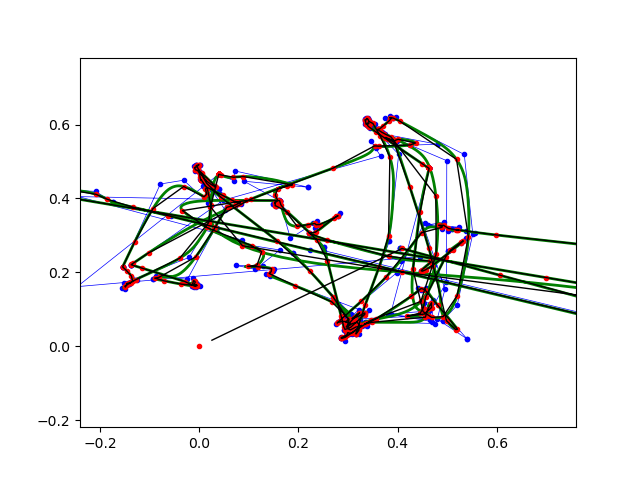

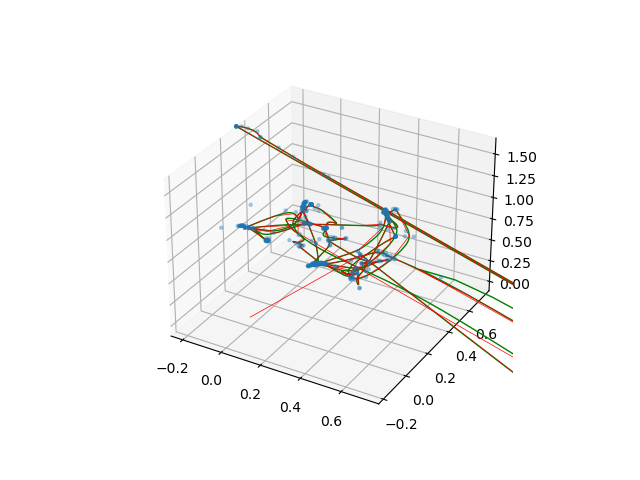

In [152]:
# downsample

def downsample_1d_signal(t_high, t_low, up_signal):
    down = np.zeros(len(t_low))
    t0 = t_low[0]
    j = 0
    for i in range(len(t_high)):
        if t0 + i == t_low[j]:
            down[j] = up_signal[i]
            j += 1

    return down

def up_t(time, new_interval):
    return np.arange(np.min(time), np.max(time), new_interval)

def upsample_1d(signal, time, new_interval):
    t_new = up_t(time, new_interval)
    interpf = interp.interp1d(time.reshape(-1, ), signal.reshape(-1, ))
    out = interpf(t_new)
    return out

f_sig_down = [downsample_1d_signal(t_new, t, f_sig[i]) for i in range(3)]


ax = plt.figure().add_subplot()
down_up = []
for i in range(3):
    down_up.append(upsample_1d(f_sig_down[i], t, 1))
    
ax.plot(signal[0], signal[2], 'b.', label='data', linewidth=2)
ax.plot(signal[0], signal[2], 'b-', label='data', linewidth=0.5)
ax.plot(f_sig[0], f_sig[2], 'g-', label='data', linewidth=2)
ax.plot(f_sig_down[0], f_sig_down[2], 'r.', linewidth=1, label='filtered data')
ax.plot(down_up[0], down_up[2], 'k-', label='data', linewidth=1)
ax.set_xlim(table_x - table_rad, table_x + table_rad)
ax.set_ylim(table_z - table_rad, table_z + table_rad)
    
ax = plt.figure().add_subplot(111, projection='3d')
ax.scatter(signal[0], signal[2], signal[1], 'rX', s = 5) 
ax.plot(f_sig[0], f_sig[2], f_sig[1], c='green', linewidth = 1)  # note: in unity, y is up
ax.plot(f_sig_down[0], f_sig_down[2], f_sig_down[1], c='red', linewidth = 0.5)  # note: in unity, y is up
# # ax.plot(ma_filt[0], ma_filt[2],  ma_filt[1], linewidth=0.5);
ax.set_xlim(table_x - table_rad, table_x + table_rad)
ax.set_ylim(table_z - table_rad, table_z + table_rad)

7573
8
[-0.7938089 -0.7938089 -0.7938089 -0.7938089 -0.7938089 -0.7938089
 -0.7938089 -0.7938089]
8
[1.608794 1.608794 1.608794 1.608794 1.608794 1.608794 1.608794 1.608794]
8
[0.4981088 0.4981088 0.4981088 0.4981088 0.4981088 0.4981088 0.4981088
 0.4981088]
[-0.7938089 -0.7938089 -0.7938089 -0.7938089 -0.7938089 -0.7938089
 -0.7938089 -0.7938089 -0.7938089 -0.7938089]
[0.48258194 0.64775419 0.83706293 1.05035828 1.28701301 1.54591855
 1.82549418 2.1237095  2.43811968 2.76591291]


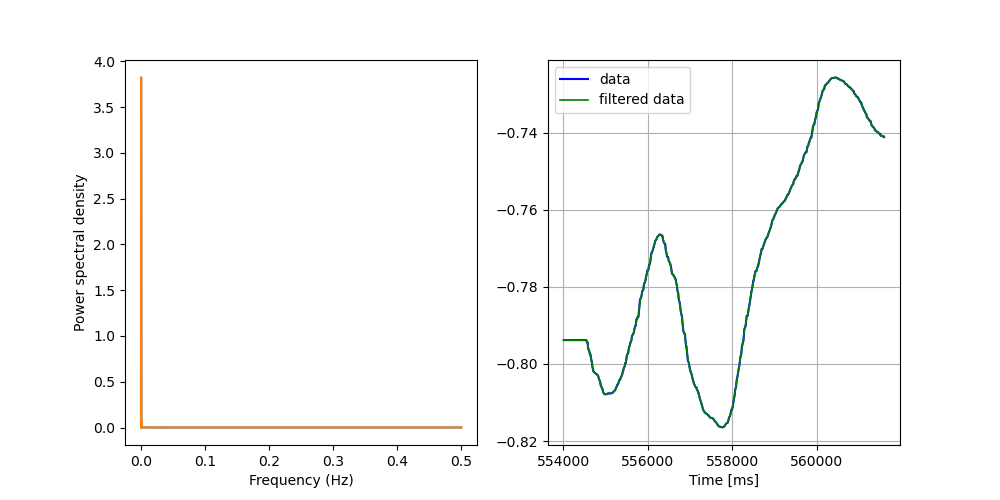

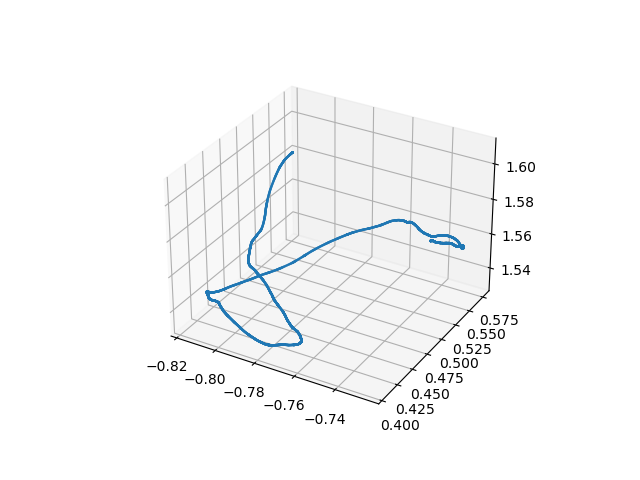

In [91]:
# filter and plot cam data
# butterworth lp 30/40hz >> median filter 7 or 9 points >> moving average 3 points



cam_x = upsample(tps.camera_x.to_numpy(), t, t_new)
cam_z = upsample(tps.camera_z.to_numpy(), t, t_new)
cam_y = upsample(tps.camera_y.to_numpy(), t, t_new)

# Filter requirements.
order = 1
fs = 1000       # sample rate, Hz
cutoff = 30  # desired cutoff frequency of the filter, Hz

cam_x_b = zero_lag_butter(cam_x, cutoff, fs, order)
cam_y_b = zero_lag_butter(cam_y, cutoff, fs, order)
cam_z_b = zero_lag_butter(cam_z, cutoff, fs, order)

med_window = 75   
print(len(cam_x_b))
cam_x_b_m = ssg.medfilt(cam_x_b, med_window)
cam_y_b_m = ssg.medfilt(cam_y_b, med_window)
cam_z_b_m = ssg.medfilt(cam_z_b, med_window)

ma_window = 17
cam_x_b_m_ma = zero_moving_average(cam_x_b_m, ma_window)
cam_y_b_m_ma = zero_moving_average(cam_y_b_m, ma_window)
cam_z_b_m_ma = zero_moving_average(cam_z_b_m, ma_window)

cam_filt = [cam_x_b_m_ma, cam_y_b_m_ma, cam_z_b_m_ma]
# cam_filt = [cam_x_b_m, cam_y_b_m, cam_z_b_m]
# cam_filt = [cam_x_b, cam_y_b, cam_z_b]

# Get the filter coefficients so we can check its frequency response.
b, a = butter_lowpass(cutoff, fs, order)


x = cam_x
fig, ax_list = plt.subplots(1,2, figsize=(10, 5), dpi=100)
# fig 2 - psd
ax=ax_list[0]
f, Pxx_den = ssg.periodogram(x)
ax.plot(f, Pxx_den)
ax.plot(f, Pxx_den)
ax.set_ylabel('Power spectral density')
ax.set_xlabel('Frequency (Hz)')

# Demonstrate the use of the filter.
# Filter the data, and plot both the original and filtered signals.


print(x[:10])
print(y[:10])
ax = ax_list[1]
ax.plot(t_new, x, 'b-', label='data')
ax.plot(t_new, cam_filt[0], 'g-', linewidth=1.2, label='filtered data')
ax.set_xlabel('Time [ms]')
ax.grid()
ax.legend()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cam_filt[0], cam_filt[2], cam_filt[1],  s = 0.5)  # note: in unity, y is up
# ax.plot(ma_filt[0], ma_filt[2],  ma_filt[1], linewidth=0.5);
# size = table_rad + 0
# ax.set_xlim(table_x - size, table_x + size)
# ax.set_zlim(0, 2)
# ax.set_ylim(table_z - size, table_z + size)

[[-0.7938089  0.4981088  1.608794 ]
 [-0.7938089  0.4981088  1.608794 ]
 [-0.7938089  0.4981088  1.608794 ]
 [-0.7938089  0.4981088  1.608794 ]
 [-0.7938089  0.4981088  1.608794 ]
 [-0.7938089  0.4981088  1.608794 ]
 [-0.7938089  0.4981088  1.608794 ]
 [-0.7938089  0.4981088  1.608794 ]
 [-0.7938089  0.4981088  1.608794 ]
 [-0.7938089  0.4981088  1.608794 ]
 [-0.7938089  0.4981088  1.608794 ]
 [-0.7938089  0.4981088  1.608794 ]
 [-0.7938089  0.4981088  1.608794 ]
 [-0.7938089  0.4981088  1.608794 ]
 [-0.7938089  0.4981088  1.608794 ]
 [-0.7938089  0.4981088  1.608794 ]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


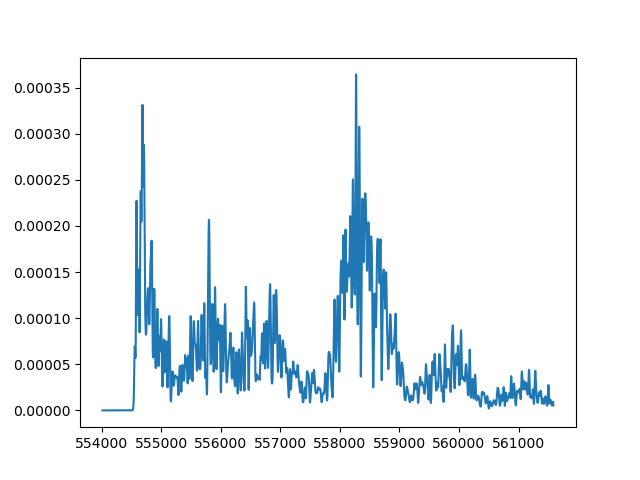

In [110]:
# process cam velocity to flag errors
# up-sampled cam data
cam_matrix = np.concatenate([cam_filt[0].reshape(len(cam_filt[0]), 1),
                             cam_filt[2].reshape(len(cam_filt[0]), 1),
                             cam_filt[1].reshape(len(cam_filt[0]), 1)], axis=1)

# distance
def displacement_vector(point_matrix):
    return np.sqrt(np.apply_over_axes(np.sum, np.diff(point_matrix, axis=0)**2, [1])).flatten()

cam_dist = displacement_vector(cam_matrix)  # dist = velocity because delta_t = 1
print(cam_matrix[:16])
print(cam_dist[:15])
ax = plt.figure().add_subplot()
ax.plot(t_new[1:], cam_dist)



7573
[[ 0.83318811  0.          1.13535058]
 [ 0.99681339  0.          1.13535058]
 [ 1.18970722 -0.04538032  1.13535058]
 ...
 [ 0.40527453  0.2657888   0.69972627]
 [ 0.40525947  0.2657888   0.69972627]
 [ 0.40524779  0.2657888   0.69972627]]
[1.63625280e-01 1.98160042e-01 2.26596790e-01 ... 1.94124425e-05
 1.50578339e-05 1.16800533e-05]
7572


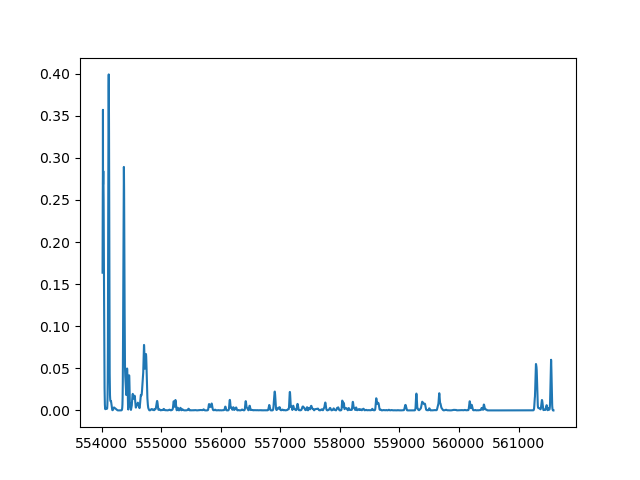

In [129]:
x, y, z = f_sig

# x = x.flatten()
# y = y.flatten()
# z = z.flatten()
print(len(x))
point_matrix = np.concatenate([x.reshape(-1, 1), z.reshape(-1, 1), y.reshape(-1, 1)], axis=1)
print(point_matrix)

# distance
def displacement_vector(point_matrix):
    return np.sqrt(np.apply_over_axes(np.sum, np.diff(point_matrix, axis=0)**2, [1])).flatten()
distance = displacement_vector(point_matrix)
print(distance)
print(len(distance))

# velocity
time_diff = np.diff(t_new)   # this will just be array of 1s because of interp and up_sampling
v = list(distance / time_diff)
ax = plt.figure().add_subplot()
ax.plot(t_new[1:], v)

# acceleration
delta_v = np.diff(v)
acc = np.abs(delta_v / time_diff[1:])

[[ 0.83318811  0.          1.13535058]
 [ 0.99681339  0.          1.13535058]
 [ 1.18970722 -0.04538032  1.13535058]]
[[-0.7938089  0.4981088  1.608794 ]
 [-0.7938089  0.4981088  1.608794 ]
 [-0.7938089  0.4981088  1.608794 ]]
[[ 1.62699701 -0.4981088  -0.47344342]
 [ 1.79062229 -0.4981088  -0.47344342]
 [ 1.98351612 -0.54348912 -0.47344342]]


(array([6.859e+03, 4.940e+02, 1.200e+02, 6.800e+01, 2.600e+01, 2.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([1.47877933e-06, 1.90226980e-01, 3.80452481e-01, 5.70677982e-01,
        7.60903483e-01, 9.51128983e-01, 1.14135448e+00, 1.33157999e+00,
        1.52180549e+00, 1.71203099e+00, 1.90225649e+00]),
 <BarContainer object of 10 artists>)

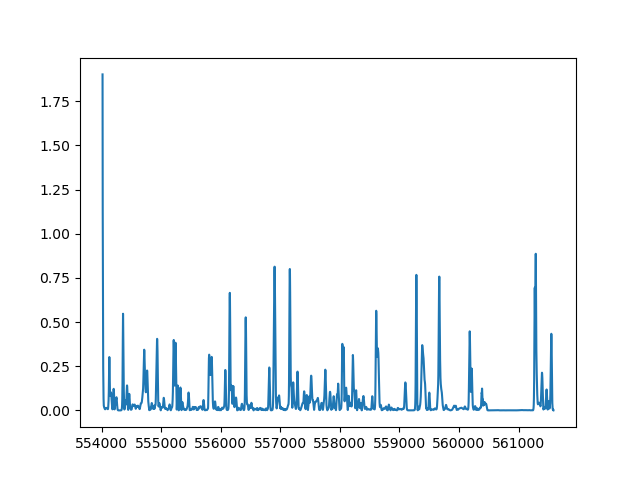

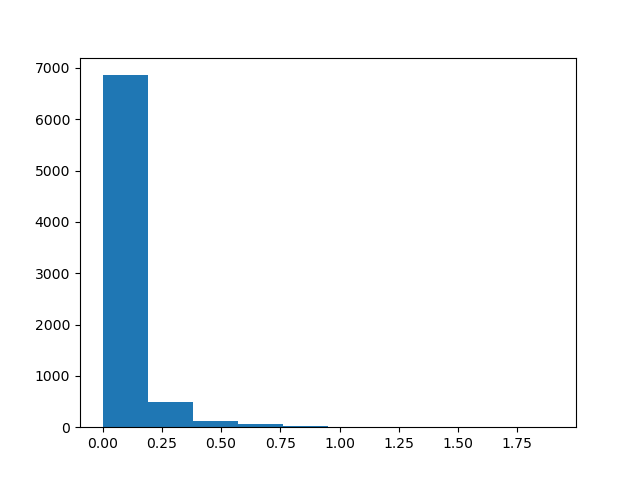

In [130]:
# angular_shift
def angle_between(v1: np.array, v2: np.array) -> float:
    """Compute the angle theta between vectors v1 and v2.

    The scalar product of v1 and v2 is defined as:
      dot(v1,v2) = mag(v1) * mag(v2) * cos(theta)

    where dot() is a function which computes the dot product and mag()
    is a function which computes the magnitude of the given vector.

    Args:
        v1: vector with dim (m x n)
        v2: with dim (m x n)

    Returns:
        theta: angle between vectors v1 and v2 in degrees.
    """
    norms = np.linalg.norm(v1) * np.linalg.norm(v2)
    cos_theta = np.dot(v1, v2) / norms
    theta = np.arccos(np.clip(cos_theta, -1, 1))
    return np.rad2deg(theta)

# print(cam_matrix)
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(cam_x, cam_z, cam_y, '.')  # note: in unity, y is up

vectors = point_matrix - cam_matrix
print(point_matrix[:3, :])
print(cam_matrix[:3, :])
print(vectors[:3, :])
angles = []
for i in range(1, len(vectors)):
    angles.append(angle_between(vectors[i-1], vectors[i]))
# print(angles[:3])
# print(len(angles))
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(t_new[1:], angles)
ax = plt.figure().add_subplot()
ax.hist(angles)


[1.90225649 1.34459574 1.27402513 1.13042586 0.98644332]
[-0.55766075 -0.07057061 -0.14359927 -0.14398254 -0.13176919]
[0.55766075 0.07057061 0.14359927 0.14398254 0.13176919]


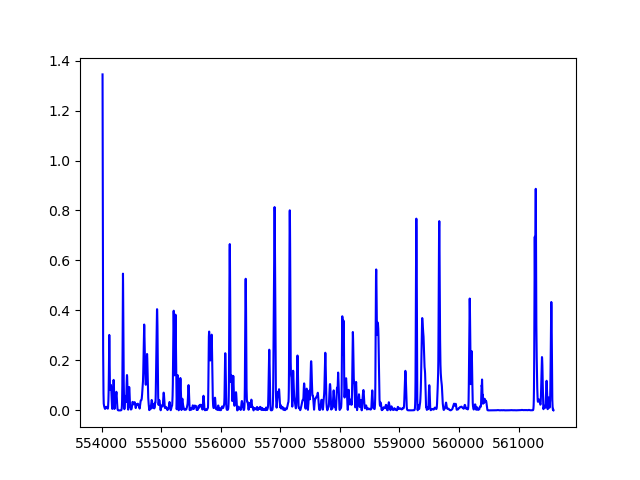

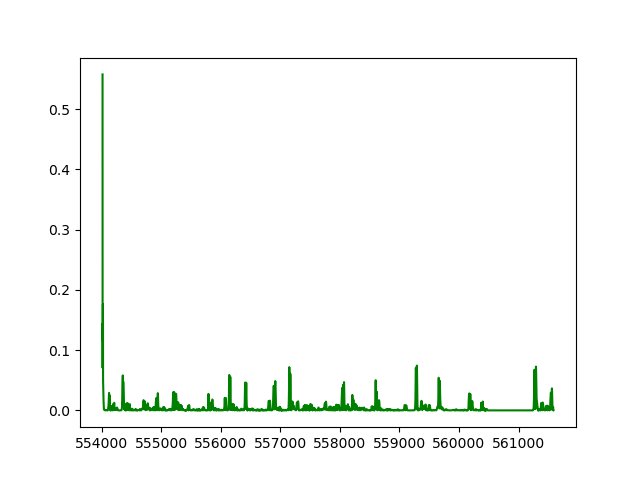

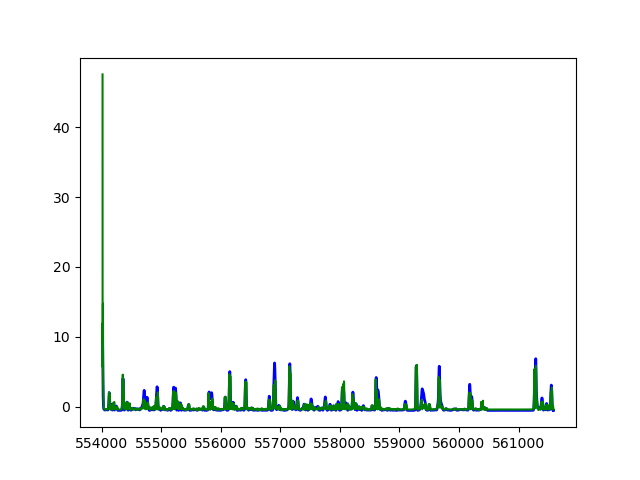

In [131]:
# angular_velocity
v_angular = angles/time_diff

# acceleration
delta_v = np.diff(v)
acc = np.abs(delta_v / time_diff[1:])
delta_v_angles = np.diff(v_angular)
acc_ang = np.abs(delta_v_angles / time_diff[1:])
print(v_angular[:5])
print(delta_v_angles[:5])
# print(acc[:5])
print(acc_ang[:5])
ax = plt.figure().add_subplot()
ax.plot(t_new[2:], v_angular[1:], 'b-') 
ax = plt.figure().add_subplot()
ax.plot(t_new[2:], acc_ang, 'g-')
from sklearn import preprocessing
va_s = preprocessing.StandardScaler().fit(v_angular.reshape(-1, 1)).transform(v_angular.reshape(-1, 1))
aa_s = preprocessing.StandardScaler().fit(acc_ang.reshape(-1, 1)).transform(acc_ang.reshape(-1, 1))
ax = plt.figure().add_subplot()
ax.plot(t_new[2:], va_s[1:], 'b-', linewidth=2) 
ax.plot(t_new[2:], aa_s, 'g-', linewidth=1.5)

12
[0.3484941 0.3484941 0.3484941 0.3484941 0.3484941 0.3484941 0.3484941
 0.3484941 0.3484941 0.3484941 0.3484941 0.3484941]
12
[0.50748346 0.50748346 0.50748346 0.50748346 0.50748346 0.50748346
 0.50748346 0.50748346 0.50748346 0.50748346 0.50748346 0.50748346]


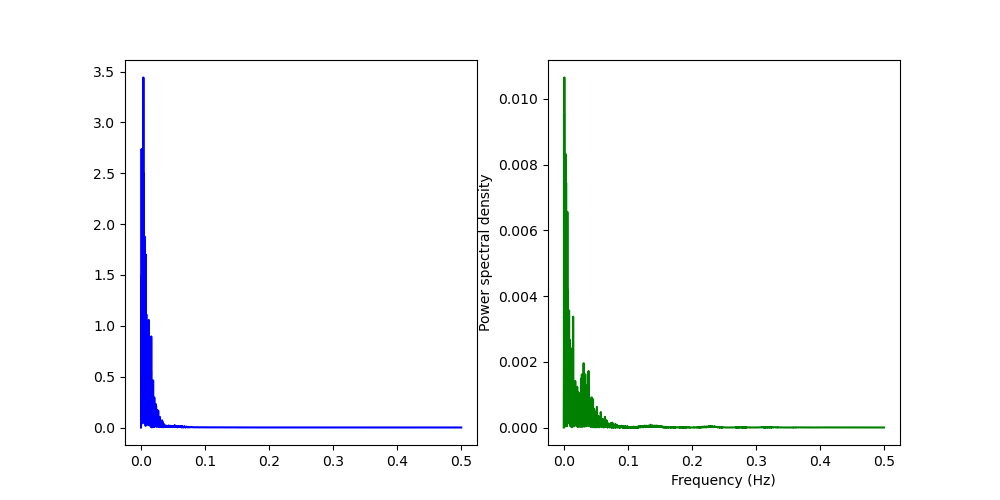

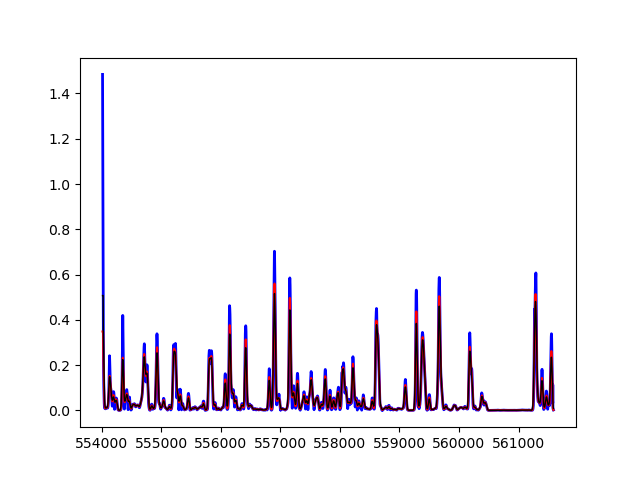

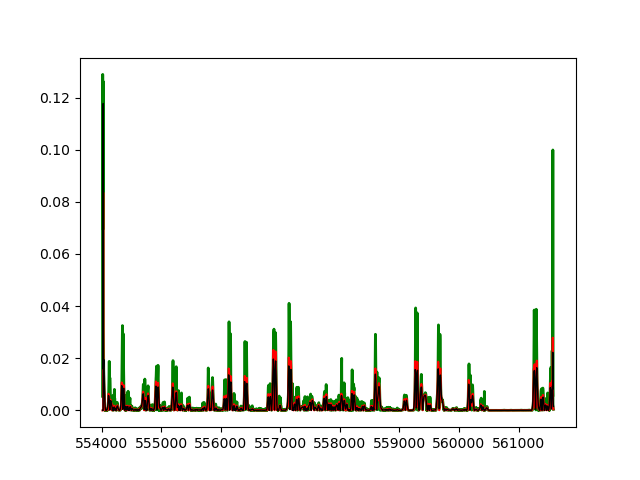

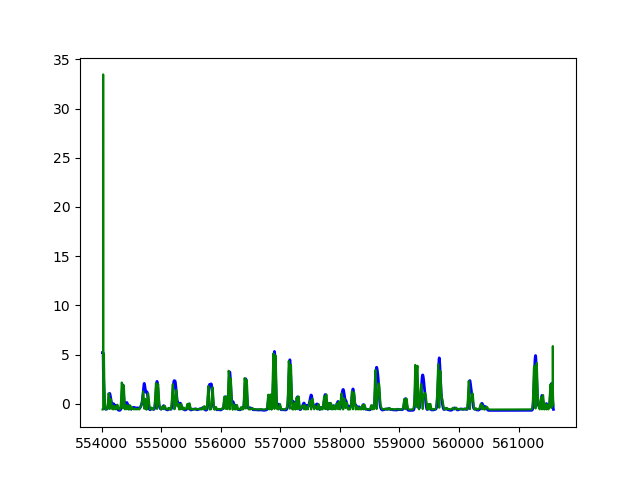

In [127]:
# 

def mf_ma_filter(x, mf_window, ma_window):
    return zero_moving_average(ssg.medfilt(x, mf_window), ma_window)

mf_window = 25
ma_window = 25
# Filter requirements.
order = 1
fs = 1000       # sample rate, Hz
cutoff = 30  # desired cutoff frequency of the filter, Hz
v_ang_mmf = mf_ma_filter(v_angular, mf_window, ma_window)
acc_ang_mmf = np.abs(np.diff(v_ang_mmf))
v_ang_bmmf = filter_signal(v_angular, order, fs, cutoff, mf_window, ma_window)
acc_ang_bmmf = np.abs(np.diff(v_ang_bmmf))

fig, ax_list = plt.subplots(1,2, figsize=(10, 5), dpi=100)
# fig 2 - psd
ax=ax_list[0]
f, Pxx_den = ssg.periodogram(v_angular)
ax.plot(f, Pxx_den, 'b-')
ax=ax_list[1]
f, Pxx_den = ssg.periodogram(acc_ang)
ax.plot(f, Pxx_den, 'g-')
ax.set_ylabel('Power spectral density')
ax.set_xlabel('Frequency (Hz)')

# raw vs filtered v/a signals
ax = plt.figure().add_subplot()
ax.plot(t_new[2:], v_angular[1:], 'b-', linewidth=2) 
ax.plot(t_new[2:], v_ang_mmf[1:], 'r-', linewidth=1.5) 
ax.plot(t_new[2:], v_ang_bmmf[1:], 'k-', linewidth=1) 
ax = plt.figure().add_subplot()
ax.plot(t_new[2:], acc_ang, 'g-', linewidth=2)
ax.plot(t_new[2:], acc_ang_mmf, 'r-', linewidth=1.5)
ax.plot(t_new[2:], acc_ang_bmmf, 'k-', linewidth=1)
from sklearn import preprocessing
va_f_s = preprocessing.StandardScaler().fit(v_ang_bmmf.reshape(-1, 1)).transform(v_ang_bmmf.reshape(-1, 1))
aa_f_s = preprocessing.StandardScaler().fit(acc_ang_bmmf.reshape(-1, 1)).transform(acc_ang_bmmf.reshape(-1, 1))
ax = plt.figure().add_subplot()
ax.plot(t_new[2:], va_f_s[1:], 'b-', linewidth=2) 
ax.plot(t_new[2:], aa_f_s, 'g-', linewidth=1.5)

In [98]:
# limit to 3sd

def max_sd(data, n):
    sd_max = n*np.std(data)
    return np.where(data < sd_max, data, sd_max)

v_trunc = max_sd(v, 2)
v_ang_trunc = max_sd(v_angular, 3)
acc_trunc = max_sd(acc, 3)
acc_ang_trunc = max_sd(acc_ang, 3)

In [20]:
three60 = np.array([360 for i in range(len(v_ang_trunc))]).reshape(len(v_ang_trunc),).astype(np.float64)
v_ang_inv = three60 - v_ang_trunc

ValueError: x and y must have same first dimension, but have shapes (7571,) and (7547,)

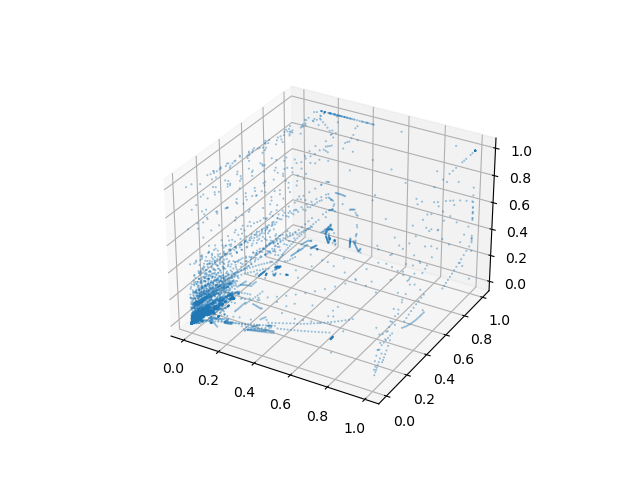

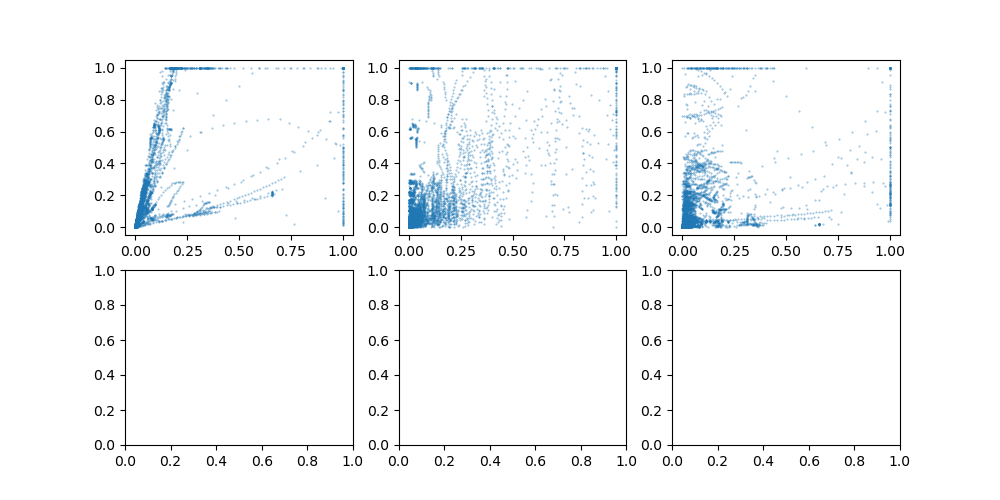

In [99]:
from scipy import stats



dat_3d = [v_trunc[1:], v_ang_trunc[1:], acc_ang_trunc]

# norm data
# x = stats.zscore(dat_3d[0])
# y = stats.zscore(dat_3d[1])
# z = stats.zscore(dat_3d[2])
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))
x = NormalizeData(dat_3d[0])
y = NormalizeData(dat_3d[1])
z = NormalizeData(dat_3d[2])
# print(len(x))
# print(len(y))
# print(len(z))
s = 0.2
alpha = 0.5
lw =1
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, '.', s=s, alpha=alpha) 

fig, ax_list = plt.subplots(2,3, figsize=(10, 5), dpi=100)

ax_list[0,0].scatter(x, y, s=s, alpha=alpha)
ax_list[0,1].scatter(z, y, s=s, alpha=alpha)
ax_list[0,2].scatter(x, z, s=s, alpha=alpha)

ax_list[1,0].plot(t_new[2:], x, linewidth=lw)
ax_list[1,1].plot(t_new[2:], y, linewidth=lw)
ax_list[1,2].plot(t_new[2:], z, linewidth=lw)


In [41]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

data = np.concatenate([x.reshape(len(x),1), y.reshape(len(x),1), z.reshape(len(x),1)], axis=1)
sil = np.zeros([5])
print(sil)

sil = np.zeros([6])
range_clusters = range(2, 6)
data_tenth = data[0:10:, :]
for n_clust in range_clusters:
    kmeans = KMeans(n_clusters=n_clust, random_state=0, n_init=5).fit(data_tenth)
    silh = silhouette_score(data_tenth, kmeans.labels_)
    sil[n_clust] = np.mean(silh)
print(sil)

# n_clust = np.argmax(sil)
n_clust = 10
print(f'n. clusters = {n_clust}')
kmeans = KMeans(n_clusters=n_clust, random_state=0, n_init=5).fit(data)

import matplotlib.cm as cm

colors = cm.nipy_spectral(kmeans.labels_.astype(float) / n_clust)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z, s=s,c=colors)
ax = plt.figure().add_subplot()
ax.scatter(t_new[2:], x, s=s, c=colors)
fig2 = plt.figure()
ax = fig2.add_subplot(111, projection='3d')
ax.scatter(up_signal[0][2:], up_signal[2][2:], up_signal[1][2:], c=colors, s=s, alpha=1)
ax.plot(up_signal[0][2:], up_signal[2][2:], up_signal[1][2:], linewidth=0.2)
ax.set_xlim(table_x - table_rad, table_x + table_rad)
ax.set_ylim(table_z - table_rad, table_z + table_rad)

# IMPORTANT Fixation periods shorter than 25 ms in duration were also reclassified as saccades.

fix_group = np.argmin(np.mean(kmeans.cluster_centers_, axis=1))
new_labels = np.where(kmeans.labels_ == fix_group, 0, 1)
# print(new_labels[:100])
ax = plt.figure().add_subplot()
colors = cm.nipy_spectral(new_labels.astype(float) / 2)
ax.scatter(t_new[2:], x, s=s, c=colors)

# apply fixation threshold 25ms
fix_threshold = 25
fix_length = 0
fix_start_ind = 0
thresholded_labels = []
thresholded_labels.extend(new_labels)
thresholded_labels = np.array(thresholded_labels)
# print(thresholded_labels[:200])
for i in range(1, len(new_labels)):
    this_label = thresholded_labels[i]
    prev_label = thresholded_labels[i-1]
    
    if this_label == 0 and prev_label == 1:
        # print(f"fixation start at {i}")
        fix_start_ind = i
        # print(f"fix_start_ind: {fix_start_ind}")
        fix_length +=1
    elif this_label == 1 and prev_label ==1:
        # print(f"saccade continued at {i}")
        pass
    elif this_label == 1 and prev_label == 0:
        # print(f"fixation ended at {i}")
        # print(f"fixation length {fix_length}")
        if fix_length < fix_threshold:
            thresholded_labels[fix_start_ind:i-1] = 1
            # print(f"fixation adjusted at indices {fix_start_ind}:{i-1}")
        fix_length = 0
    elif this_label == 0 and prev_label == 0:
        # print(f"fixation continued at {i}")
        fix_length +=1
        
# print(np.mean(cam_x))
# print(np.mean(tps.camera_z))
ax = plt.figure().add_subplot()
colors = cm.nipy_spectral(thresholded_labels.astype(float) / 2)
ax.scatter(t_new[2:], v_ang_trunc[1:], s=s, c=colors)  
# ax.axhline(0.05)

fig2 = plt.figure()
ax = fig2.add_subplot(111, projection='3d')
ax.plot([origin_x, table_x], [origin_z, table_z], [origin_y, table_y], lw=2)
ax.scatter(up_signal[0][2:], up_signal[2][2:], up_signal[1][2:], c=colors, s=0.2, alpha=1)
ax.set_xlim(table_x - table_rad, table_x + table_rad)
ax.set_ylim(table_z - table_rad, table_z + table_rad)

[0. 0. 0. 0. 0.]


ValueError: n_samples=1 should be >= n_clusters=2.

400
rot: (28.248975, 357.4175, 100.83404999999999)
cart: (-0.8651978109943779, 0.4733039083042787, 0.16557825411095448)
back to rot: r: 1.0, theta: -10.83404999999999, phi: 61.751025
to table: (1.0337683719917008, -0.21669793651452307, -0.7559500497925318)
table r: 1.29888241207638, theta: -36.17638824162184, phi: -80.39619972141202
table cart: (-1.0337683719917008, 0.21669793651452296, 0.7559500497925318)


(0.0, 2.0)

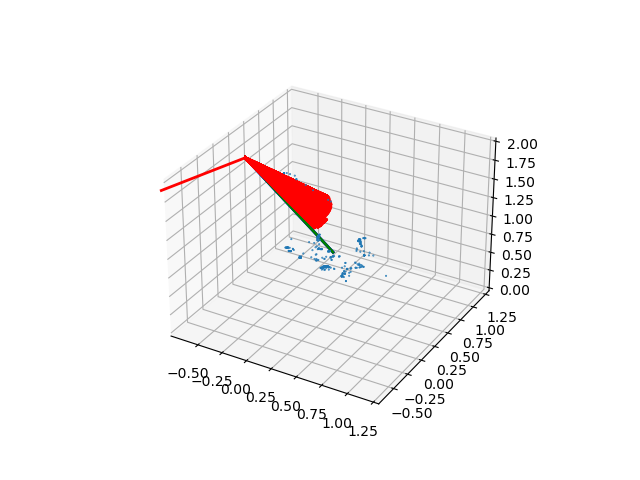

In [27]:
# project 3d to 2d plane
# define 2d plane by average head location (origin) and average head rotation (norm)
window_low = 0
window_high = 400
sample = tps.iloc[window_low:window_high,:].reset_index(drop=True)
print(len(sample))
mean_rot_x = np.median(sample.cam_rotation_x)
mean_rot_y = np.median(sample.cam_rotation_y)
mean_rot_z = np.median(sample.cam_rotation_z)

print(f"rot: ({mean_rot_x}, {mean_rot_z}, {mean_rot_y})")

def spher2cart(r, theta, phi, degrees=True):
    if degrees:
        theta = theta * (np.pi / 180)
        phi = phi * (np.pi / 180)
    x = r*np.sin(phi)*np.cos(theta)
    y = r*np.sin(phi)*np.sin(theta)
    z = r*np.cos(phi)
    return x, y, z

def cart2spher(x, y, z, degrees=True):
    r = np.sqrt(np.sum([x**2, y**2, z**2]))
    theta = np.arctan(y / x) 
    phi = np.arctan((np.sqrt(x**2 + y**2))/z)
    if degrees:
        theta *= (180/np.pi)
        phi *= (180/np.pi)
    return r, theta, phi

cart_x, cart_y, cart_z = spher2cart(1, 90 - mean_rot_y, mean_rot_x - 90)
# cart_z = 0
print(f"cart: ({cart_x}, {cart_z}, {cart_y})")
r, theta, phi = cart2spher(cart_x, cart_y, cart_z)
print(f"back to rot: r: {r}, theta: {theta}, phi: {phi}")

# fig2 = plt.figure()
# ax = fig2.add_subplot(111, projection='3d')
to_table_x = table_x - origin_x 
to_table_z = table_z - origin_z
to_table_y = table_y - origin_y
print(f"to table: ({to_table_x}, {to_table_z}, {to_table_y})")
# ax.plot([origin_x, table_x], [origin_z, table_z], [origin_y, table_y], lw=2)
# ax.plot([origin_x, origin_x+cart_x], [origin_z, origin_z+cart_z], [origin_y, origin_y+cart_y], lw=2)

table_r, table_theta, table_phi = cart2spher(to_table_x, to_table_y, to_table_z)
print(f"table r: {table_r}, theta: {table_theta}, phi: {table_phi}")
table_cart_x, table_cart_y, table_cart_z = spher2cart(table_r,table_theta, table_phi)
print(f"table cart: ({table_cart_x}, {table_cart_z}, {table_cart_y})")

# plotting
fig2 = plt.figure()
ax = fig2.add_subplot(111, projection='3d')
ax.plot([origin_x, table_x], [origin_z, table_z], [origin_y, table_y], lw=2, c='b')
ax.plot([origin_x, origin_x+to_table_x], [origin_z, origin_z+to_table_z], [origin_y, origin_y+to_table_y], lw=2, c='b')
ax.plot([origin_x, origin_x-table_cart_x], [origin_z, origin_z-table_cart_z], [origin_y, origin_y-table_cart_y], lw=2,c='g')
test_deg = (16, 54)
test_x, test_y, test_z  = spher2cart(1, test_deg[0], test_deg[1])
ax.plot([origin_x, origin_x-test_x], [origin_z, origin_z-test_y], [origin_y, origin_y-test_z], lw=2,c='r')
for i in range(len(sample)):
    cam_y = 90- sample.cam_rotation_y[i]
    cam_x = sample.cam_rotation_x[i] - 90
    px, py, pz = spher2cart(1, cam_y, cam_x)
    # print(f"point: ({px}, {py}, {pz})")
    ax.plot([origin_x, origin_x-px], [origin_z, origin_z-py], [origin_y, origin_y-pz], lw=2,c='r')
    
ax.scatter(signal[0][window_low:window_high], 
           signal[2][window_low:window_high], 
           signal[1][window_low:window_high], 
           s=0.2, alpha=1)
ax.set_xlim(table_x - 1, table_x + 1)
ax.set_ylim(table_z - 1, table_z + 1)
ax.set_zlim(0, 2)



In [28]:
# a(x-x0) + b(y-y0) + c(z-z0) = 0

def project_3d_to_2d(normal, plane_point, point_3d):
    a, b, c = normal
    x0, y0, z0 = plane_point
    x, y, z = point_3d
    #a*x - a*x0 + b*y - b*y0 + c*z - c*z0 = 0
    #a*x +b*y + c*z - (a*x0 + b*y0 + c*z0) = 0
    d = [a*x0 + b*y0 + c*z0]
    k = (d - (a*x) - (b*y) - (c*z))/(a**2 + b**2 + c**2)
    return x + (k*a), y + (k*b), z + (k*c)



origin: (-0.7742016719917008, 0.49789503651452305, 1.5559500497925318)


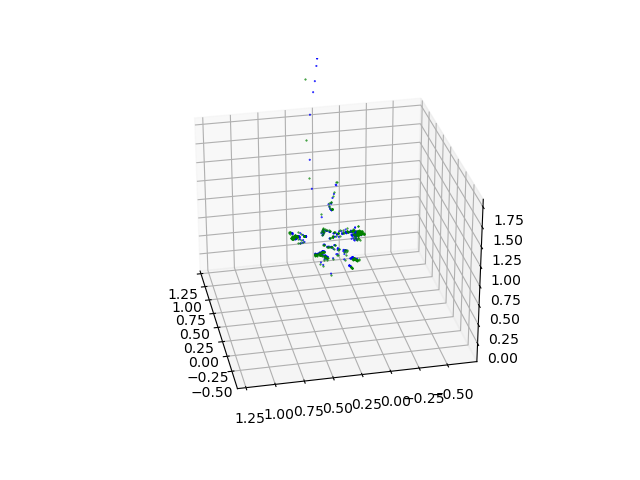

In [42]:
print(f"origin: ({origin_x}, {origin_z}, {origin_y})")

table_vector = np.array([table_cart_x, table_cart_z, table_cart_y])
point_3d = (signal[0][point], signal[2][point], signal[1][point])

# plotting
fig2 = plt.figure()
ax = fig2.add_subplot(111, projection='3d')

ax.plot([origin_x, origin_x-table_cart_x], [origin_z, origin_z-table_cart_z], [origin_y, origin_y-table_cart_y], lw=2,c='g')

for i in range(len(sample)):
    point_3d = (signal[0][window_low + i],
                signal[2][window_low + i],
                signal[1][window_low + i])
    # norm = normal
    norm = table_vector
    x, y, z = project_3d_to_2d(norm, 
                        [origin_x, origin_z, origin_y],
                        point_3d)
    ax.scatter(x, y, z, s=0.2, alpha =1, c='g')
    
ax.scatter(signal[0][window_low:window_high], 
           signal[2][window_low:window_high], 
           signal[1][window_low:window_high], 
           s=0.2, alpha=1, c='b')
ax.set_xlim(table_x - 1, table_x + 1)
ax.set_ylim(table_z - 1, table_z + 1)
ax.set_zlim(table_y - 1, table_y + 1)
ax.view_init(elev=28, azim=168)


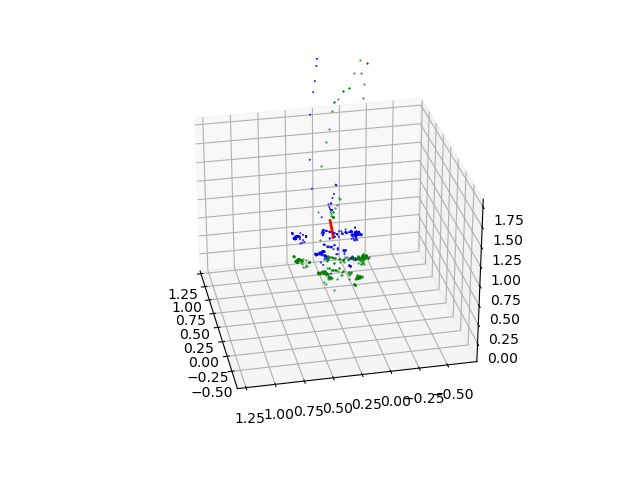

In [30]:
# project to average head direction

mean_head_dir_y = 90 - np.mean(sample.cam_rotation_y)
mean_head_dir_x = np.mean(sample.cam_rotation_x) - 90
m_head_v_x, m_head_v_y, m_head_v_z = spher2cart(1, mean_head_dir_y, mean_head_dir_x)
norm = (m_head_v_x, m_head_v_y, m_head_v_z)
fig2 = plt.figure()
ax = fig2.add_subplot(111, projection='3d')

ax.plot([origin_x, origin_x-table_cart_x], [origin_z, origin_z-table_cart_z], [origin_y, origin_y-table_cart_y], lw=2,c='g')
ax.plot([origin_x, origin_x-m_head_v_x], [origin_z, origin_z-m_head_v_y], [origin_y, origin_y-m_head_v_z], lw=2,c='r')
for i in range(len(sample)):
    point_3d = (signal[0][window_low + i],
                signal[2][window_low + i],
                signal[1][window_low + i])
    # norm = table_vector
    x, y, z = project_3d_to_2d(norm, [origin_x, origin_z, origin_y], point_3d)
    ax.scatter(x, y, z, s=0.2, alpha =1, c='g')
ax.scatter(signal[0][window_low:window_high], 
           signal[2][window_low:window_high], 
           signal[1][window_low:window_high], 
           s=0.2, alpha=1, c='b')
ax.set_xlim(table_x - 1, table_x + 1)
ax.set_ylim(table_z - 1, table_z + 1)
ax.set_zlim(table_y - 1, table_y + 1)
ax.view_init(elev=28, azim=168)

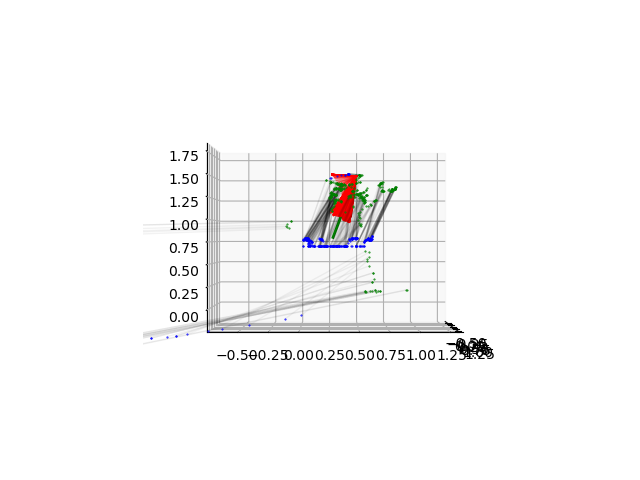

In [31]:
# project to head direction per timepoint


fig2 = plt.figure()
ax = fig2.add_subplot(111, projection='3d')

ax.plot([origin_x, origin_x-table_cart_x], [origin_z, origin_z-table_cart_z], [origin_y, origin_y-table_cart_y], lw=2,c='g')

for i in range(len(sample)):
    point_3d = (signal[0][window_low + i],
                signal[2][window_low + i],
                signal[1][window_low + i])
    head_dir_y = 90 - sample.cam_rotation_y[i]
    head_dir_x = sample.cam_rotation_x[i] - 90
    head_v_x, head_v_y, head_v_z = spher2cart(1, head_dir_y, head_dir_x)
    ax.plot([origin_x, origin_x-head_v_x], [origin_z, origin_z-head_v_y], [origin_y, origin_y-head_v_z], lw=1,c='r', alpha=0.5)
    norm = (head_v_x, head_v_y, head_v_z)
    # norm = table_vector
    x, y, z = project_3d_to_2d(norm, [origin_x, origin_z, origin_y], point_3d)
    ax.scatter(x, y, z, s=0.2, alpha =1, c='g')
    world_x, world_y, world_z = (signal[0][window_low + i], signal[2][window_low + i], signal[1][window_low + i])
    ax.scatter(world_x, world_y, world_z, s=0.2, alpha=1, c='b')
    points = (x, y, z, world_x, world_y, world_z)
    x, y, z = (x[0], y[0], z[0])
    # for j in range(len(points)):
    #     points[j] = points[j].reshape(len(points[j]))
    ax.plot([x, world_x], [y, world_y], [z, world_z], lw=1,c='k', alpha=0.05)

ax.set_xlim(table_x - 1, table_x + 1)
ax.set_ylim(table_z - 1, table_z + 1)
ax.set_zlim(table_y - 1, table_y + 1)
ax.view_init(elev=0, azim=0)

7573
[[0.24988986 0.24549739 1.48896207]
 [0.5445765  0.15542199 1.45972797]
 [0.83950996 0.0653871  1.43037794]
 ...
 [0.40273953 0.26234374 0.69857123]
 [0.40212256 0.26140425 0.69821409]
 [0.40109428 0.25983843 0.69761885]]
[[-0.79748202  0.4903888   1.50846322]
 [-0.80259357  0.47041076  1.48481111]
 [-0.80768532  0.45052631  1.46104729]
 [-0.81319628  0.42886354  1.43710021]
 [-0.81905911  0.40569544  1.41315841]
 [-0.82541443  0.38042038  1.38922456]
 [-0.83185141  0.35479604  1.3652911 ]
 [-0.83827276  0.32923863  1.34135631]
 [-0.84467149  0.30377809  1.31742007]
 [-0.85105283  0.27839206  1.29348247]]


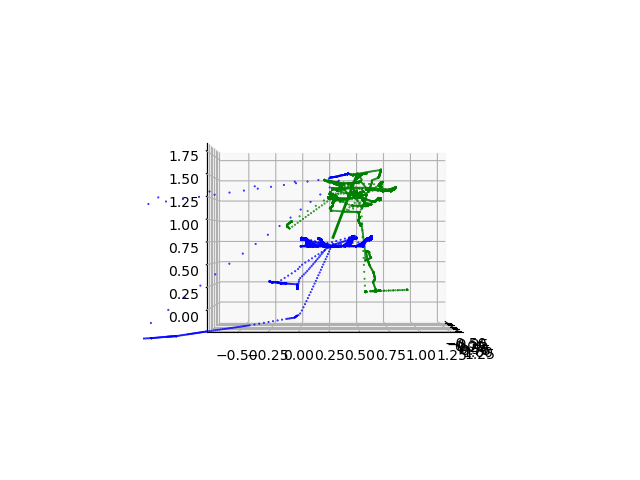

In [109]:
# vary origin per sample - also upsample and save

x, y, z = filtered_signals
o = cam_matrix
rot_x = upsample(tps.cam_rotation_x.to_numpy(), t, t_new)
rot_z = upsample(tps.cam_rotation_z.to_numpy(), t, t_new)
rot_y = upsample(tps.cam_rotation_y.to_numpy(), t, t_new)

rot = np.concatenate([rot_x.reshape(len(rot_x), 1),
                      rot_z.reshape(len(rot_z), 1),
                      rot_y.reshape(len(rot_y), 1)], axis=1)
print(len(x))
point_matrix = np.concatenate([x, z, y], axis=1)
print(point_matrix)
proj_mat = np.zeros(np.shape(point_matrix))


for i in range(len(t_new)):
    head_rot_x = rot[i, 0] - 90
    head_rot_y = 90 - rot[i, 2]
    head_v_x, head_v_y, head_v_z = spher2cart(1, head_rot_y, head_rot_x)
    norm = (head_v_x, head_v_y, head_v_z)
    x,y,z = project_3d_to_2d(norm, o[i,:], point_matrix[i,:])
    proj_mat[i,:] = (x[0], y[0], z[0])
    

fig2 = plt.figure()
ax = fig2.add_subplot(111, projection='3d')

ax.plot([origin_x, origin_x-table_cart_x], [origin_z, origin_z-table_cart_z], [origin_y, origin_y-table_cart_y], lw=2,c='g')
ax.scatter(proj_mat[:,0], proj_mat[:,1], proj_mat[:,2], s=0.2, alpha =1, c='g')
# ax.plot([o[:,0], o[:,0]-head_v_x], [origin_z, o[:,1]-head_v_y], [origin_y, o[:,2]-head_v_z], lw=1,c='r', alpha=0.5)
ax.scatter(point_matrix[:,0], point_matrix[:,1], point_matrix[:,2], s=0.2, alpha=1, c='b')
# ax.plot([x, world_x], [y, world_y], [z, world_z], lw=1,c='k', alpha=0.05)
ax.set_xlim(table_x - 1, table_x + 1)
ax.set_ylim(table_z - 1, table_z + 1)
ax.set_zlim(table_y - 1, table_y + 1)
ax.view_init(elev=0, azim=0)
print(proj_mat[:10,:])

[0.03137949 0.03140122 0.03275834 ... 0.00019272 0.00129522 0.00207294]
7572


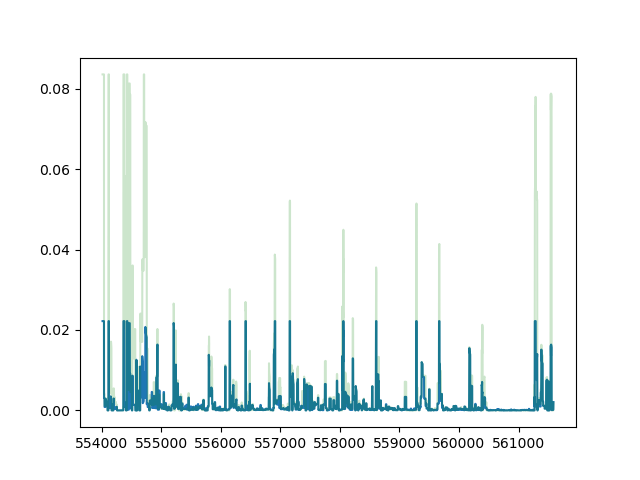

In [110]:
# calculate projected distance, velocity and acceleration

# distance
def displacement_vector(point_matrix):
    return np.sqrt(np.apply_over_axes(np.sum, np.diff(point_matrix, axis=0)**2, [1])).flatten()
proj_dist = displacement_vector(proj_mat)
print(proj_dist)
print(len(proj_dist))

# velocity
time_diff = np.diff(t_new)   # this will just be array of 1s because of interp and up_sampling
v_proj = list(proj_dist / time_diff)
v_proj_trunc = max_sd(v_proj, 3)
ax = plt.figure().add_subplot()
ax.plot(t_new[1:], v_proj_trunc)
ax.plot(t_new[1:], v_trunc, c='g', alpha=0.2)

# acceleration
delta_v_proj = np.diff(v_proj)
acc_proj = np.abs(delta_v_proj / time_diff[1:])
acc_proj_trunc = max_sd(acc_proj, 3)

[0. 0. 0. 0. 0.]
[0.         0.         0.60019957 0.55871449 0.46148349 0.39920874]
n. clusters = 5
before: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0]
fixation adjusted at indices 108:132
fixation adjusted at indices 138:148
fixation adjusted at indices 417:441
fixation adjusted at indices 617:632
fixation adjusted at indices 642:666
fixation adjusted at indices 675:691
fixation adjusted at indices 925:949
fixation adjusted at indices 1200:1216
fixation adjusted at indices 1233:1257
fixation adjusted at indices 2142:2148
fixation adjusted at indices 2155:2157
fixation adjusted at indices 2174:2190
fixation adjusted at indices 2

(-0.21880290000000002, 0.7811971)

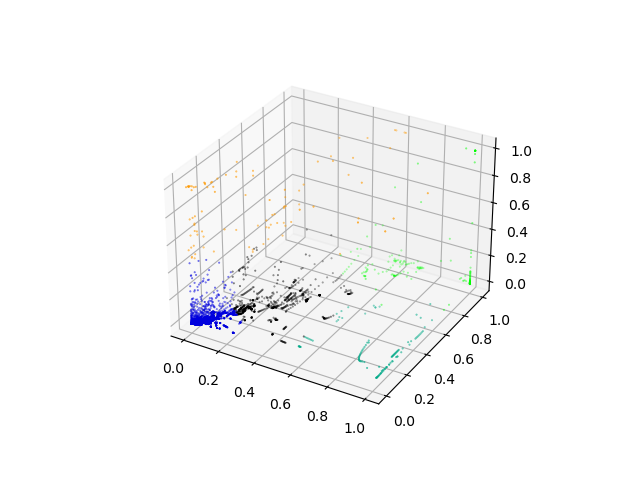

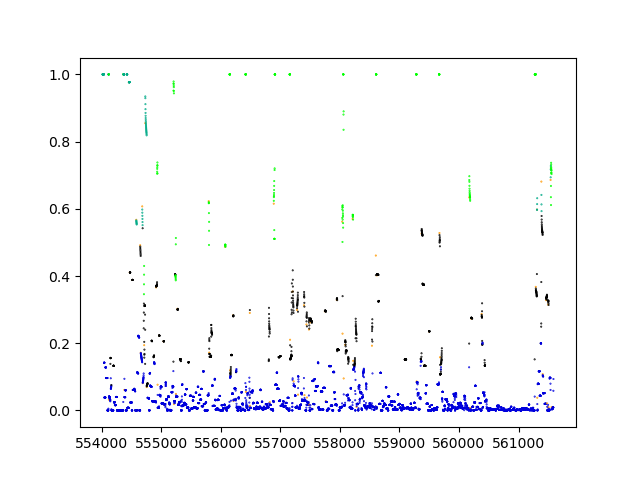

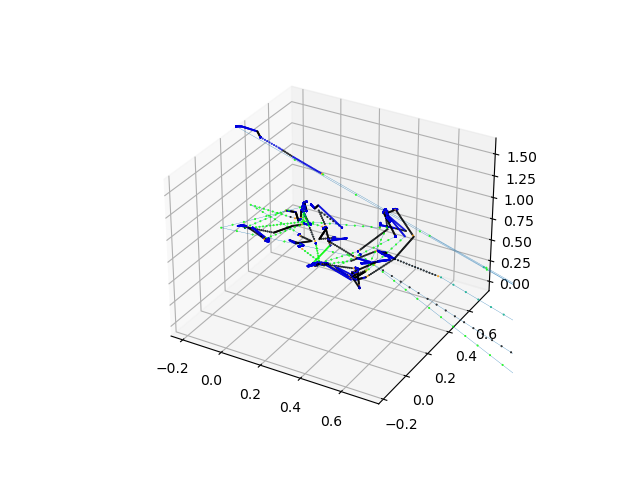

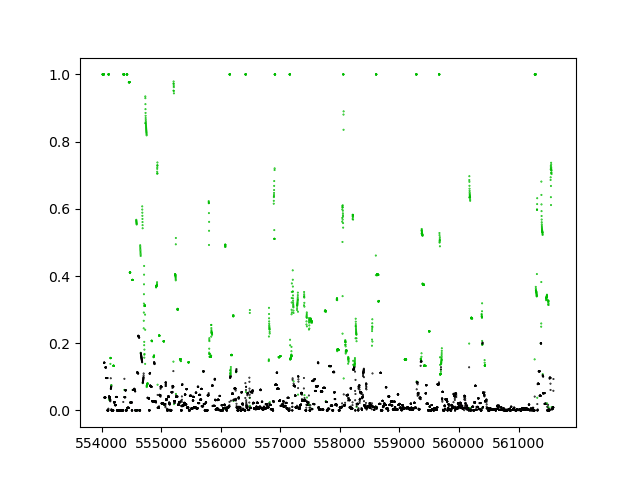

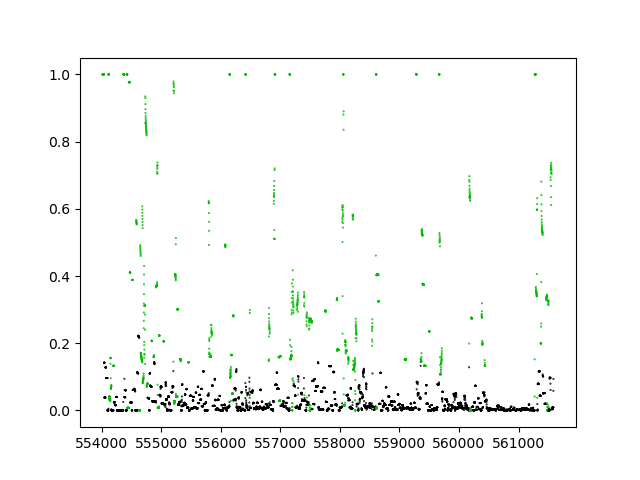

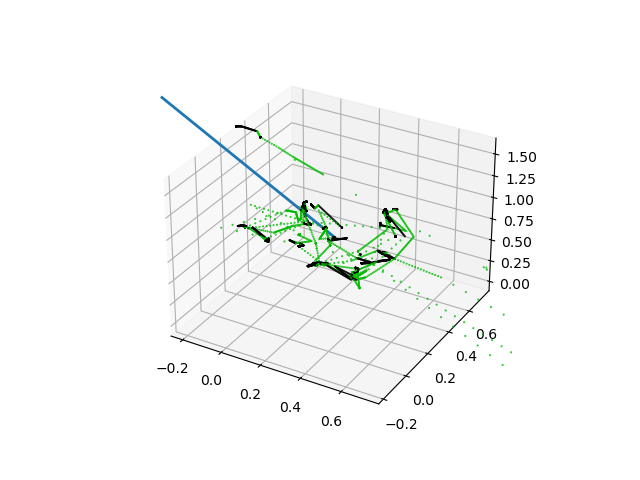

In [111]:
dat_3d = [v_proj_trunc[1:], v_ang_trunc[1:], acc_proj_trunc]

# norm data
# x = stats.zscore(dat_3d[0])
# y = stats.zscore(dat_3d[1])
# z = stats.zscore(dat_3d[2])
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))
x = NormalizeData(dat_3d[0])
y = NormalizeData(dat_3d[1])
z = NormalizeData(dat_3d[2])

data = np.concatenate([x.reshape(len(x),1), y.reshape(len(x),1), z.reshape(len(x),1)], axis=1)
sil = np.zeros([5])
print(sil)

sil = np.zeros([6])
range_clusters = range(2, 6)
data_tenth = data[0:10:, :]
for n_clust in range_clusters:
    kmeans = KMeans(n_clusters=n_clust, random_state=0, n_init=5).fit(data_tenth)
    silh = silhouette_score(data_tenth, kmeans.labels_)
    sil[n_clust] = np.mean(silh)
print(sil)

# n_clust = np.argmax(sil)
n_clust = 5
print(f'n. clusters = {n_clust}')
kmeans = KMeans(n_clusters=n_clust, random_state=0, n_init=5).fit(data)

colors = cm.nipy_spectral(kmeans.labels_.astype(float) / n_clust)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z, s=s,c=colors)
ax = plt.figure().add_subplot()
ax.scatter(t_new[2:], x, s=s, c=colors)
fig2 = plt.figure()
ax = fig2.add_subplot(111, projection='3d')
ax.scatter(up_signal[0][2:], up_signal[2][2:], up_signal[1][2:], c=colors, s=s, alpha=1)
ax.plot(up_signal[0][2:], up_signal[2][2:], up_signal[1][2:], linewidth=0.2)
ax.set_xlim(table_x - table_rad, table_x + table_rad)
ax.set_ylim(table_z - table_rad, table_z + table_rad)

# IMPORTANT Fixation periods shorter than 25 ms in duration were also reclassified as saccades.

fix_group = np.argmin(np.mean(kmeans.cluster_centers_, axis=1))
new_labels = np.where(kmeans.labels_ == fix_group, 0, 1)
# print(new_labels[:100])
ax = plt.figure().add_subplot()
colors = cm.nipy_spectral(new_labels.astype(float) / 2)
ax.scatter(t_new[2:], x, s=s, c=colors)

# apply fixation threshold 25ms
fix_threshold = 25
fix_length = 0
fix_start_ind = 0
thresholded_labels = []
thresholded_labels.extend(new_labels)
thresholded_labels = np.array(thresholded_labels)
print(f"before: {thresholded_labels[:200]}")
# print(thresholded_labels[:200])
for i in range(1, len(new_labels)):
    this_label = thresholded_labels[i]
    prev_label = thresholded_labels[i-1]
    
    if this_label == 0 and prev_label == 1:
        # print(f"fixation start at {i}")
        fix_start_ind = i
        # print(f"fix_start_ind: {fix_start_ind}")
        fix_length +=1
    elif this_label == 1 and prev_label ==1:
        # print(f"saccade continued at {i}")
        pass
    elif this_label == 1 and prev_label == 0:
        # print(f"fixation ended at {i}")
        # print(f"fixation length {fix_length}")
        if fix_length < fix_threshold:
            thresholded_labels[fix_start_ind:i] = 1
            print(f"fixation adjusted at indices {fix_start_ind}:{i}")
        fix_length = 0
    elif this_label == 0 and prev_label == 0:
        # print(f"fixation continued at {i}")
        fix_length +=1
print(f"after: {thresholded_labels[:200]}") 
ax = plt.figure().add_subplot()
colors = cm.nipy_spectral(thresholded_labels.astype(float) / 2)
ax.scatter(t_new[2:], x, s=s, c=colors)  
# ax.axhline(0.05)

fig2 = plt.figure()
ax = fig2.add_subplot(111, projection='3d')
ax.plot([origin_x, table_x], [origin_z, table_z], [origin_y, table_y], lw=2)
ax.scatter(up_signal[0][2:], up_signal[2][2:], up_signal[1][2:], c=colors, s=0.2, alpha=1)
ax.set_xlim(table_x - table_rad, table_x + table_rad)
ax.set_ylim(table_z - table_rad, table_z + table_rad)

In [112]:
# add fixation, fix_start, fix_end columns to original df

print(len(new_labels))
print(len(up_sig))
fixation = np.where(thresholded_labels == 1, 0, 1)
print(fixation)

# print(fixation[:1000])
# print(fix_start[:1000])
# print(fix_end[:1000])



7571
7573
[0 0 0 ... 1 1 1]


In [113]:
# downsample to uniform 120Hz

fix_down = np.zeros(len(t), dtype=int)
t0 = t[0]
t_new_add = t_new + t0

# print(t0)
j=0
start = 0
for i in range(len(t_new)):
    if t0 + i == t[j]:
        p_fix_points = np.sum(fixation[start:i])/len(fixation[start:i])
        if p_fix_points > 0.5:
            fix_down[j] = 1
        else:
            fix_down[j] = 0  
        j +=1
        start = i
        
# add fix_start and fix_end
fix_start = np.zeros(fix_down.shape, dtype=int)
fix_end = np.zeros(fix_down.shape, dtype=int)
for i in range(1,len(fix_down)):
    this_tp = fix_down[i]
    prev_tp = fix_down[i-1]
    if this_tp == 1 and prev_tp == 0:
        fix_start[i] = 1
    if this_tp == 0 and prev_tp == 1:
        fix_end[i] = 1

print(np.sum(fix_start))
print(np.sum(fix_end))

47
47


C:\Users\Luke\AppData\Local\Temp\ipykernel_19260\3789331964.py:12: RuntimeWarning: invalid value encountered in long_scalars
  p_fix_points = np.sum(fixation[start:i])/len(fixation[start:i])


In [114]:
# add to OG tp df

tps['fixation'] = fix_down
tps['fixation_start'] = fix_start
tps['fixation_end'] = fix_end
tps.head(30)

eye_timestamp_ms              gaze_object  gaze_collision_x  \
0             554013  FirstInstructionsCanvas          0.250856   
1             554038                     Well          7.620410   
2             554046                     Well          7.596853   
3             554063                     Well          7.582600   
4             554071                     Well          7.589627   
5             554096                     Well          7.647853   
6             554113                     Well          7.647853   
7             554121            OcclusionDome          0.223210   
8             554146            OcclusionDome          0.035535   
9             554155            OcclusionDome         -0.057564   
10            554163            OcclusionDome         -0.174315   
11            554196            OcclusionDome         -0.174315   
12            554205            OcclusionDome         -0.208612   
13            554221            OcclusionDome         -0.259433   
14            554238            OcclusionDome         -0.294708   
15            554255            OcclusionDome         -0.316876   
16            554263            OcclusionDome         -0.316876   
17            554280            OcclusionDome         -0.316876   
18            554305            OcclusionDome         -0.316876   
19            554313            OcclusionDome         -0.316876   
20            554330            OcclusionDome         -0.316876   
21            554346            OcclusionDome         -0.316876   
22            554363            OcclusionDome         -0.316876   
23            554380           FloorFocusArea          5.668822   
24            554396           FloorFocusArea          5.990191   
25            554405           FloorFocusArea          6.498610   
26            554421           FloorFocusArea          6.498610   
27            554430           FloorFocusArea          7.441011   
28            554455           FloorFocusArea          7.563954   
29            554471           FloorFocusArea          6.264470   

    gaze_collision_y  gaze_collision_z  left_gaze_origin_x  \
0           1.490129          0.258980            32.15085   
1           0.751966         -2.130015            32.18372   
2           0.771597         -2.141181            32.19153   
3           0.782404         -2.147938            32.20164   
4           0.804456         -2.144607            32.20575   
5           0.838873         -2.117006            32.23398   
6           0.838873         -2.117006            32.24475   
7           1.500963          0.260007            32.24847   
8           1.520893          0.320891            32.26881   
9           1.536140          0.353042            32.27454   
10          1.548636          0.389235            32.28026   
11          1.548636          0.389235            32.31212   
12          1.565192          0.419166            32.32614   
13          1.566186          0.422439            32.35541   
14          1.565788          0.424782            32.36223   
15          1.564151          0.414735            32.34862   
16          1.564151          0.414735            32.36667   
17          1.564151          0.414735            32.36667   
18          1.564151          0.414735            32.18097   
19          1.564151          0.414735            32.24280   
20          1.564151          0.414735            32.41791   
21          1.564151          0.414735            32.45793   
22          1.564151          0.414735            32.40091   
23          0.000191         -0.933409            32.42299   
24          0.000191         -0.995428            32.40729   
25          0.000191         -1.121682            32.39523   
26          0.000191         -1.121682            32.37996   
27          0.000191         -0.939479            32.38742   
28          0.000191         -0.971842            32.42053   
29          0.000191         -1.023513            32.41954   

   